Para comenzar el análisis, necesitaremos importar las bibliotecas principales que utilizaremos a lo largo del proyecto. 

In [ ]:
# Importación de bibliotecas básicas para análisis de datos
import pandas as pd
import numpy as np

# Bibliotecas para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para mejorar la visualización en Jupyter Notebook
plt.style.use('seaborn')
%matplotlib inline

# Para ignorar advertencias (usar con precaución)
import warnings
warnings.filterwarnings('ignore')

# Para manipulación de fechas
from datetime import datetime

# Para análisis geoespacial (si es necesario)
import folium

# Para modelado estadístico (si se requiere más adelante)
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Para manejar grandes conjuntos de datos eficientemente (opcional)
import dask.dataframe as dd

print("Bibliotecas importadas correctamente.")

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

1. Carga de datos:
    - Cargar los 6 archivos CSV en DataFrames separados
    - Realizar una inspección inicial de cada DataFrame (head(), info(), describe())

Este código hace lo siguiente:

Define una lista de ciudades.
Crea un diccionario vacío dfspara almacenar los DataFrames.
Itera sobre cada ciudad:

Cargue el archivo CSV correspondiente.
Muestra las primeras 5 filas con head().
Muestra la información del DataFrame con info().
Muestra las estadísticas descriptivas con describe().
Imprime un separador de 50 caracteres para separar los resultados.

Este código es útil para obtener una visión general de los datos en cada ciudad.

In [11]:
import os
import pandas as pd

# Lista de ciudades con sus correspondientes nombres de archivo
ciudades_archivos = {
    'Londres': 'london_airbnb.csv',
    'Madrid': 'madrid_airbnb.csv',
    'Milan': 'milan_airbnb.csv',
    'Nueva York': 'NY_airbnb.csv',
    'Sidney': 'sydney_airbnb.csv',
    'Tokio': 'tokyo_airbnb.csv'
}

# Diccionario para almacenar los DataFrames
dfs = {}

# Cargar los datos de cada ciudad
for ciudad, archivo in ciudades_archivos.items():
    file_path = os.path.join('dataset', archivo)
    try:
        dfs[ciudad] = pd.read_csv(file_path)
        print(f"\nDatos de {ciudad}:")
        
        # Mostrar las primeras filas
        print("\nPrimeras 5 filas:")
        print(dfs[ciudad].head())
        
        # Mostrar información del DataFrame
        print("\nInformación del DataFrame:")
        dfs[ciudad].info()
        
        # Mostrar estadísticas descriptivas
        print("\nEstadísticas descriptivas:")
        print(dfs[ciudad].describe())
        
        print("\n" + "="*50 + "\n")
    except FileNotFoundError:
        print(f"No se pudo encontrar el archivo para {ciudad}: {file_path}")
    except Exception as e:
        print(f"Error al procesar los datos de {ciudad}: {str(e)}")



Datos de Londres:

Primeras 5 filas:
      id                                               name  host_id  \
0  11551         Arty and Bright London Apartment in Zone 2    43039   
1  13913                Holiday London DB Room Let-on going    54730   
2  90700                  Sunny Notting Hill flat & terrace   491286   
3  15400                Bright Chelsea  Apartment. Chelsea!    60302   
4  92399  MODERN SELF CONTAINED ARCHITECT FLATLET, ISLIN...   497366   

       host_name  neighbourhood_group           neighbourhood  latitude  \
0        Adriano                  NaN                 Lambeth  51.46225   
1          Alina                  NaN               Islington  51.56802   
2           Chil                  NaN  Kensington and Chelsea  51.51074   
3       Philippa                  NaN  Kensington and Chelsea  51.48796   
4  Andrea & Mark                  NaN               Islington  51.55071   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0  

Observaciones más importantes:

1. Estructura de datos:
   - La mayoría de las ciudades tienen 16 columnas, excepto Tokio que tiene 14.
   - Todas las ciudades comparten columnas como id, name, host_id, latitude, longitude, price, etc.
   - 'neighbourhood_group' está presente en todas las ciudades pero vacía en algunas (Londres, Milán, Sidney, Tokio).
   - Tokio no tiene la columna 'calculated_host_listings_count' ni 'availability_365'.

2. Tamaño de los datasets:
   - Londres: 85,068 entradas
   - Nueva York: 48,895 entradas
   - Sidney: 36,662 entradas
   - Madrid: 19,618 entradas
   - Milán: 18,322 entradas
   - Tokio: 11,466 entradas

3. Valores nulos:
   - 'last_review' y 'reviews_per_month' tienen valores nulos en todas las ciudades.
   - 'name' y 'host_name' tienen algunos valores nulos, pero son pocos.
   - 'neighbourhood_group' está completamente vacía para Londres, Milán, Sidney y Tokio.

4. Precios:
   - Los precios varían significativamente entre ciudades.
   - Tokio tiene el precio promedio más alto (14,984 yenes, aproximadamente 140 USD).
   - Nueva York tiene el precio máximo más alto (10,000 USD).
   - Hay algunos listados con precio 0 en varias ciudades, lo que podría ser un error.

5. Número de reseñas:
   - Varía mucho entre ciudades y entre listados.
   - Londres tiene el máximo más alto (716 reseñas).
   - Tokio tiene el promedio más alto de reseñas por mes (2.26).

6. Noches mínimas:
   - La mayoría de las ciudades tienen un mínimo de 1 noche.
   - Algunas tienen máximos muy altos (1125 noches en Madrid), lo que podría ser un error.

7. Disponibilidad:
   - Varía mucho entre ciudades y listados.
   - Madrid tiene la disponibilidad promedio más alta (159 días).
   - Londres tiene la más baja (118 días).

Próximos pasos:
1. Estandarizar los datasets:
   - Añadir 'neighbourhood_group' a Milán y Tokio con valores nulos.
   - Añadir 'calculated_host_listings_count' y 'availability_365' a Tokio con valores nulos.

2. Limpiar datos:
   - Investigar y posiblemente corregir precios de 0.
   - Verificar y posiblemente corregir noches mínimas extremadamente altas.
   - Decidir cómo manejar los valores nulos en 'last_review' y 'reviews_per_month'.

3. Análisis más profundo:
   - Comparar distribuciones de precios entre ciudades.
   - Analizar la relación entre ubicación y precio.
   - Investigar patrones en tipos de habitaciones y su impacto en el precio.
   - Estudiar la relación entre el número de reseñas y el precio o la disponibilidad.

4. Visualizaciones:
   - Crear mapas de calor de precios por área en cada ciudad.
   - Gráficos de barras comparando características clave entre ciudades.
   - Diagramas de dispersión para explorar relaciones entre variables numéricas.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

2. Limpieza y estandarización de datos:
    - Unificar los nombres de las columnas entre todos los DataFrames
    - Añadir las columnas faltantes en algunos datasets (ej. 'neighbourhood_group', 'calculated_host_listings_count')
    - Manejar valores nulos y outliers de manera consistente
    - Corregir tipos de datos si es necesario

- Se define un diccionario archivos que mapea el nombre de cada ciudad a su archivo CSV correspondiente.
Se inicializa un diccionario vacío dfs para almacenar los DataFrames de cada ciudad.
Se itera sobre cada ciudad y se intenta cargar el archivo CSV correspondiente. Si el archivo existe, se carga en el diccionario dfs; de lo contrario, se imprime un mensaje de error.

- Se verifica si todos los archivos se han cargado correctamente. Si no, se imprime un mensaje de error y se lanza una excepción.

- Se verifica si todos los archivos se han cargado correctamente. Si no, se imprime un mensaje de error y se lanza una excepción.

- Se definen las tasas de cambio para convertir precios a USD.
Se define un diccionario que mapea cada ciudad a su moneda correspondiente.

- Se define una lista de nombres de columnas estándar.
Se itera sobre cada DataFrame y se unifican los nombres de las columnas a minúsculas y se reemplazan los espacios por guiones bajos.
Se añaden columnas que faltan y se rellenan con NaN.

- Se itera sobre cada DataFrame y se convierte el precio a USD utilizando la tasa de cambio correspondiente.

- Se manejan los valores nulos y outliers en los DataFrames. Se rellenan valores nulos y se convierten tipos de datos según sea necesario.

- Se corrigen los tipos de datos de las columnas para asegurar que sean apropiados para el análisis posterior.

- Se imprime información sobre cada DataFrame, incluyendo estadísticas descriptivas y una comparación de precios originales frente a precios en USD.

In [3]:
import os
import pandas as pd
import numpy as np

# Verificar y cambiar el directorio de trabajo si es necesario
print("Directorio de trabajo actual:", os.getcwd())
# Si necesitas cambiar el directorio, descomenta la siguiente línea y ajusta la ruta
# os.chdir('/ruta/a/tu/carpeta/dataset')

# Cargar los datos
archivos = {
    'Londres': 'london_airbnb.csv',
    'Madrid': 'madrid_airbnb.csv',
    'Milan': 'milan_airbnb.csv',
    'Nueva_York': 'NY_airbnb.csv',
    'Sidney': 'sydney_airbnb.csv',
    'Tokio': 'tokyo_airbnb.csv'
}

dfs = {}

for ciudad, archivo in archivos.items():
    file_path = os.path.join('dataset', archivo)
    print(f"Intentando abrir: {file_path}")
    if os.path.exists(file_path):
        dfs[ciudad] = pd.read_csv(file_path)
        print(f"Archivo cargado con éxito: {archivo}")
    else:
        print(f"Error: No se pudo encontrar el archivo {file_path}")

# Verificar que todos los archivos se cargaron correctamente
if len(dfs) != len(archivos):
    print("Error: No se pudieron cargar todos los archivos.")
    print("Archivos cargados:", list(dfs.keys()))
    raise Exception("Carga de datos incompleta")

# Añadir información de tasas de cambio y monedas
tasas_cambio = {
    'GBP': 1.25,  # 1 GBP = 1.25 USD
    'EUR': 1.10,  # 1 EUR = 1.10 USD
    'USD': 1.00,  # Ya está en USD
    'AUD': 0.65,  # 1 AUD = 0.65 USD
    'JPY': 0.0093 # 1 JPY = 0.0093 USD
}

monedas = {
    'Londres': 'GBP',
    'Madrid': 'EUR',
    'Milan': 'EUR',
    'Nueva_York': 'USD',
    'Sidney': 'AUD',
    'Tokio': 'JPY'
}

# 1. Unificar los nombres de las columnas
columnas_estandar = ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
                     'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
                     'number_of_reviews', 'last_review', 'reviews_per_month',
                     'calculated_host_listings_count', 'availability_365']

for ciudad, df in dfs.items():
    df.columns = [col.lower().replace(' ', '_') for col in df.columns]
    for col in columnas_estandar:
        if col not in df.columns:
            df[col] = np.nan
    df = df[columnas_estandar]
    dfs[ciudad] = df

# Convertir precios a USD
for ciudad, df in dfs.items():
    moneda = monedas[ciudad]
    tasa = tasas_cambio[moneda]
    df['price_original'] = df['price']  # Guardamos el precio original
    df['price'] = df['price'] * tasa  # Convertimos a USD

# 2. Manejar valores nulos y outliers
for ciudad, df in dfs.items():
    # Rellenar valores nulos en neighbourhood_group
    if df['neighbourhood_group'].isnull().all():
        df['neighbourhood_group'] = df['neighbourhood']
    
    # Convertir last_review a datetime
    df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
    
    # Manejar outliers en price y minimum_nights
    df['price'] = df['price'].clip(lower=1, upper=df['price'].quantile(0.99))
    df['minimum_nights'] = df['minimum_nights'].clip(lower=1, upper=df['minimum_nights'].quantile(0.99))
    
    # Rellenar valores nulos en reviews_per_month
    df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
    
    # Rellenar valores nulos en calculated_host_listings_count y availability_365
    df['calculated_host_listings_count'] = df['calculated_host_listings_count'].fillna(1)
    df['availability_365'] = df['availability_365'].fillna(0)

# 3. Corregir tipos de datos
for ciudad, df in dfs.items():
    df['price'] = df['price'].astype(float)  # Cambiado a float para mantener decimales después de la conversión
    df['minimum_nights'] = df['minimum_nights'].astype(int)
    df['number_of_reviews'] = df['number_of_reviews'].astype(int)
    df['calculated_host_listings_count'] = df['calculated_host_listings_count'].astype(int)
    df['availability_365'] = df['availability_365'].astype(int)

# Verificar los cambios
for ciudad, df in dfs.items():
    print(f"\nDatos de {ciudad}:")
    print(df.info())
    print("\nEstadísticas descriptivas (incluyendo precio en USD):")
    print(df.describe())
    print(f"\nComparación de precios originales vs USD para {ciudad}:")
    print(df[['price_original', 'price']].describe())
    print("\n" + "="*50)

Directorio de trabajo actual: c:\Users\ibane\Desktop\airbnb
Intentando abrir: dataset\london_airbnb.csv
Archivo cargado con éxito: london_airbnb.csv
Intentando abrir: dataset\madrid_airbnb.csv
Archivo cargado con éxito: madrid_airbnb.csv
Intentando abrir: dataset\milan_airbnb.csv
Archivo cargado con éxito: milan_airbnb.csv
Intentando abrir: dataset\NY_airbnb.csv
Archivo cargado con éxito: NY_airbnb.csv
Intentando abrir: dataset\sydney_airbnb.csv
Archivo cargado con éxito: sydney_airbnb.csv
Intentando abrir: dataset\tokyo_airbnb.csv
Archivo cargado con éxito: tokyo_airbnb.csv


C:\Users\ibane\AppData\Local\Temp\ipykernel_9884\3433600741.py:83: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')



Datos de Londres:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85068 entries, 0 to 85067
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              85068 non-null  int64         
 1   name                            85042 non-null  object        
 2   host_id                         85068 non-null  int64         
 3   host_name                       85056 non-null  object        
 4   neighbourhood_group             85068 non-null  object        
 5   neighbourhood                   85068 non-null  object        
 6   latitude                        85068 non-null  float64       
 7   longitude                       85068 non-null  float64       
 8   room_type                       85068 non-null  object        
 9   price                           85068 non-null  float64       
 10  minimum_nights                  85068 non-null  int

Resultados más importantes:

1. Estructura de datos:
   - Todas las ciudades ahora tienen 17 columnas, incluyendo la nueva columna 'price_original'.
   - Los tipos de datos son consistentes entre todas las ciudades.

2. Conversión de precios:
   - Los precios se han convertido exitosamente a USD, lo que permite una comparación directa entre ciudades.
   - La columna 'price_original' mantiene los precios en la moneda original.

3. Comparación de precios entre ciudades (en USD):
   - Londres: Media $143.97, Mediana $105.00
   - Madrid: Media $115.20, Mediana $63.80
   - Milán: Media $113.66, Mediana $80.85
   - Nueva York: Media $143.96, Mediana $106.00
   - Sídney: Media $128.49, Mediana $88.40
   - Tokio: Media $127.24, Mediana $93.07

4. Outliers y valores extremos:
   - Los precios máximos se han reducido significativamente en todas las ciudades, lo que sugiere que el recorte al percentil 99 fue efectivo.
   - Los precios mínimos se han establecido en $1 para todas las ciudades, eliminando los valores de 0.

5. Valores nulos:
   - 'last_review' sigue teniendo valores nulos en todas las ciudades.
   - 'reviews_per_month' y otras columnas numéricas ya no tienen valores nulos.

6. Particularidades por ciudad:
   - Tokio: 'calculated_host_listings_count' y 'availability_365' tienen valores constantes (1 y 0 respectivamente), lo que podría indicar un problema con estos datos.
   - La columna 'neighbourhood_group' ahora está presente en todas las ciudades, aunque en algunas puede contener información redundante con 'neighbourhood'.

7. Estadísticas de reseñas:
   - Madrid tiene el mayor promedio de número de reseñas (31.86), mientras que Sídney tiene el menor (12.19).
   - Tokio tiene el promedio más alto de reseñas por mes (1.93), mientras que Milán tiene el más bajo (0.58).

8. Disponibilidad:
   - Madrid tiene la mayor disponibilidad promedio (159 días), mientras que Sídney tiene la menor (97 días).
   - Tokio muestra una disponibilidad de 0 días para todos los listados, lo cual es probablemente un error en los datos originales.

Próximos pasos:
1. Investigar y posiblemente corregir los datos anómalos de Tokio (disponibilidad y listados por anfitrión).
2. Realizar un análisis más profundo de la distribución de precios en cada ciudad.
3. Examinar la relación entre el precio y otras variables como el tipo de habitación, la ubicación y el número de reseñas.
4. Crear visualizaciones comparativas entre ciudades para variables clave como precio, disponibilidad y tipo de alojamiento.
5. Analizar los patrones geográficos de precios dentro de cada ciudad.
6. Investigar las diferencias en las tasas de ocupación (basadas en el número de reseñas y la disponibilidad) entre ciudades.

¿Quieres que nos enfoquemos en alguno de estos análisis en particular o tienes alguna otra pregunta específica sobre los datos?

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

3. Análisis exploratorio por ciudad:
    - Para cada ciudad, realizar:
        - Análisis de distribución de precios
        - Exploración de tipos de habitaciones más comunes
        - Análisis de ubicaciones populares (barrios)
        - Estudio de la relación entre precio y número de reseñas
        - Visualización de patrones geográficos usando latitud y longitud


Análisis exploratorio para Londres



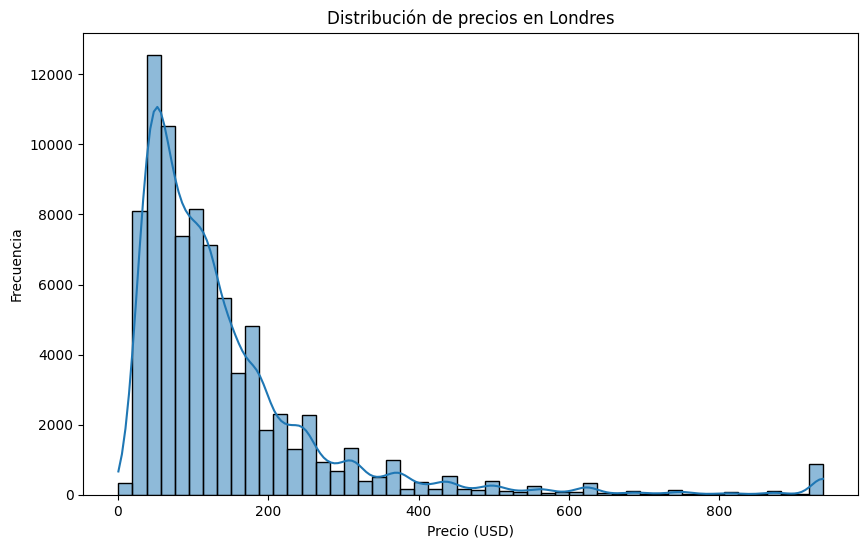

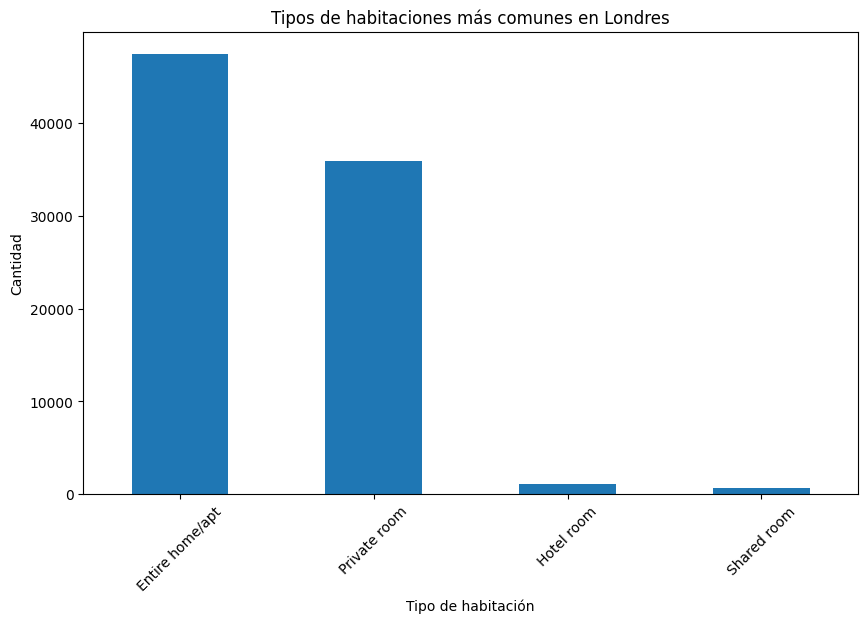

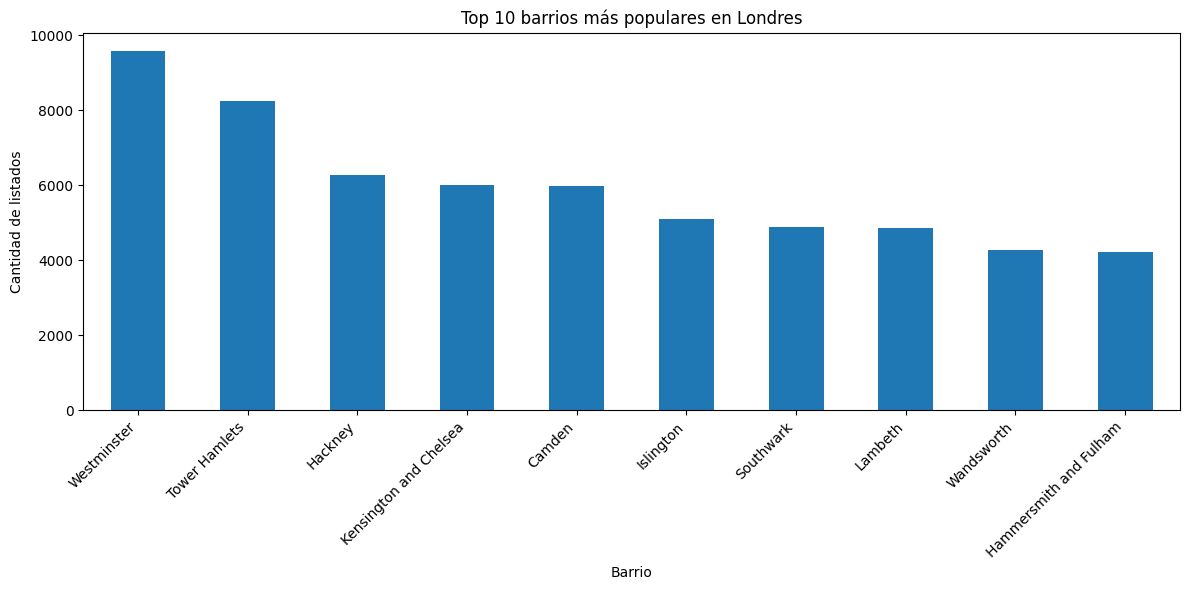

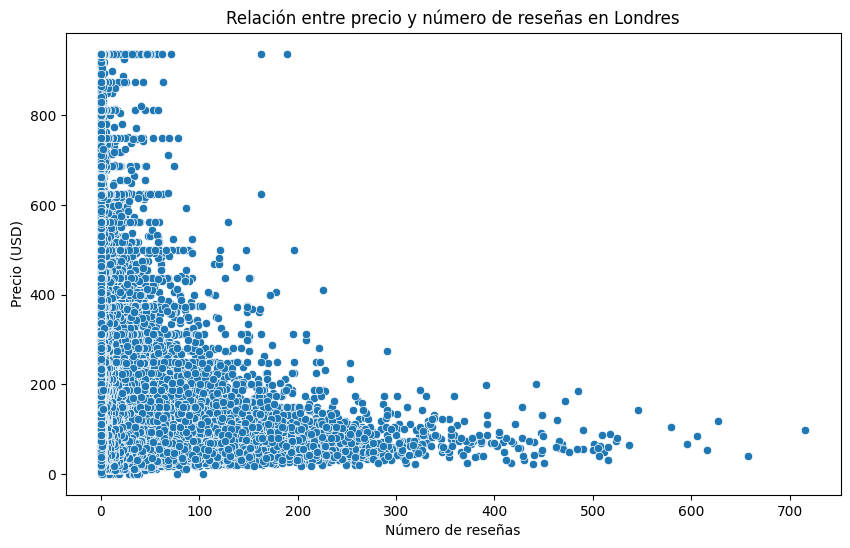

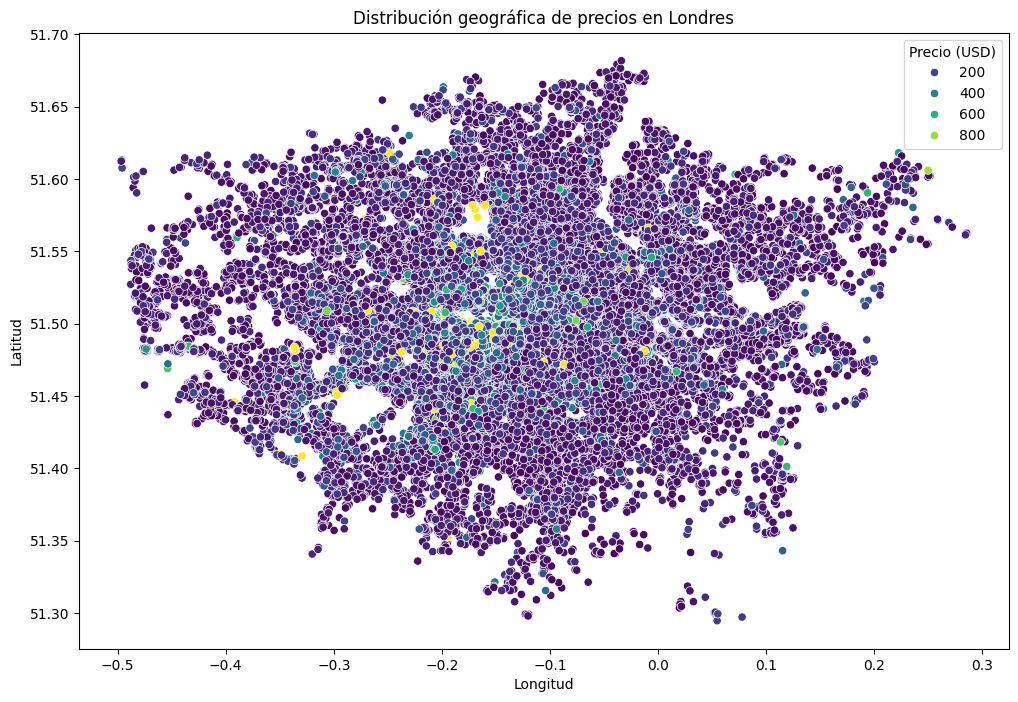




Análisis exploratorio para Madrid



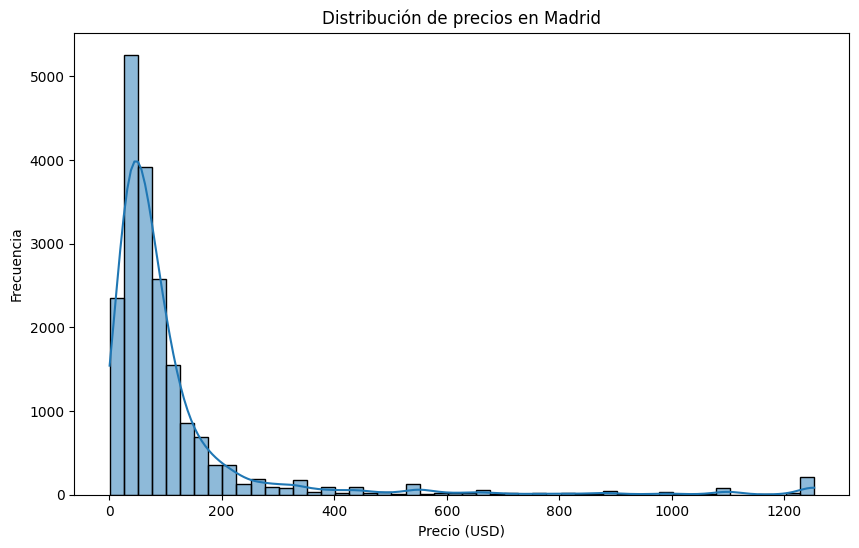

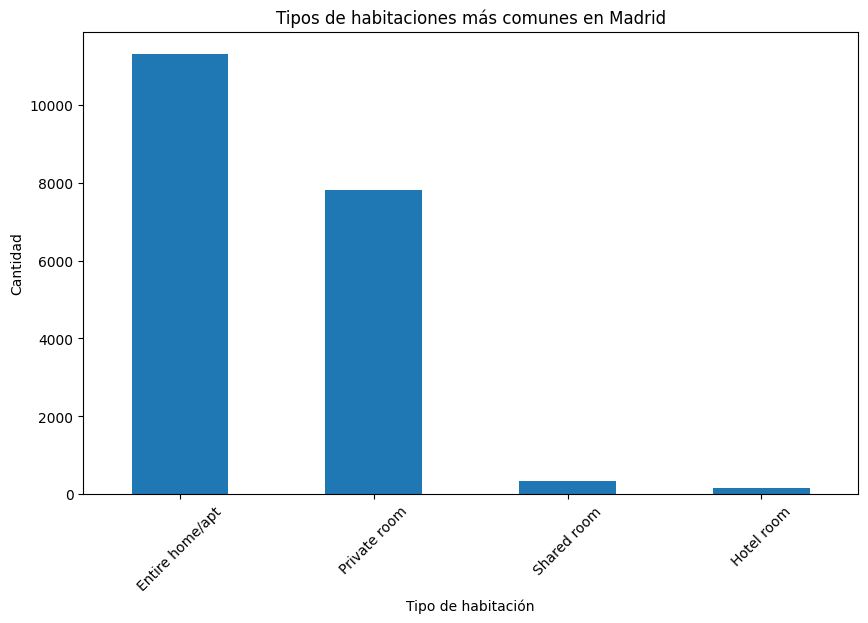

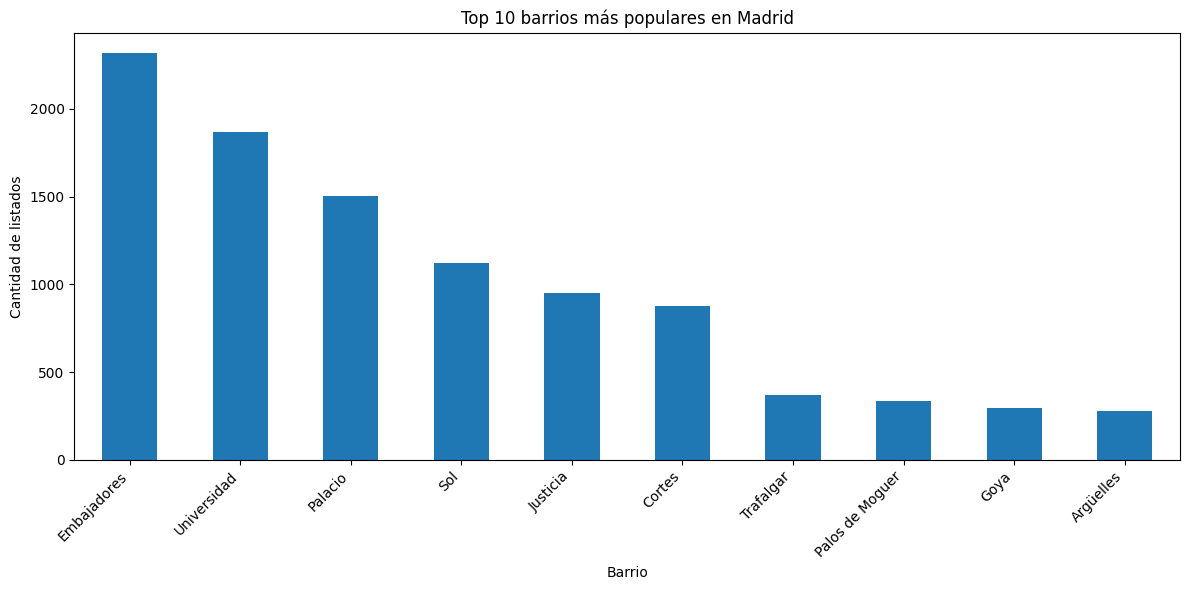

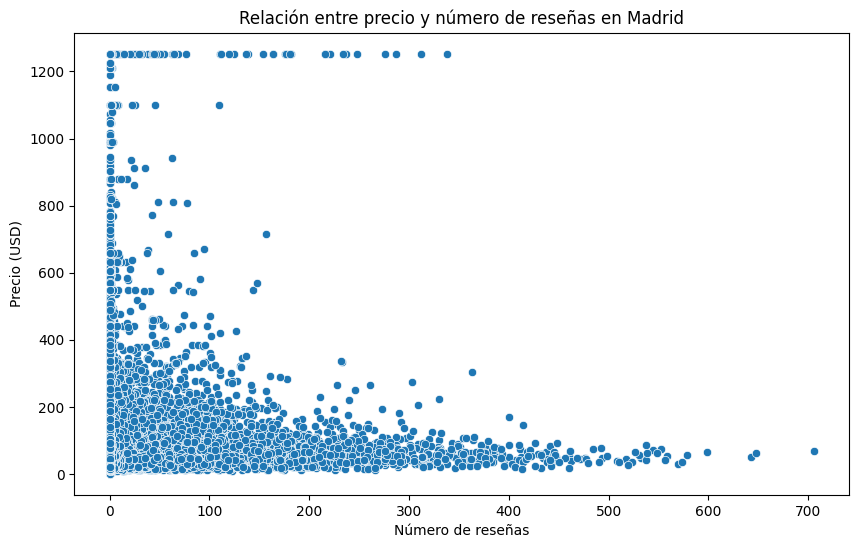

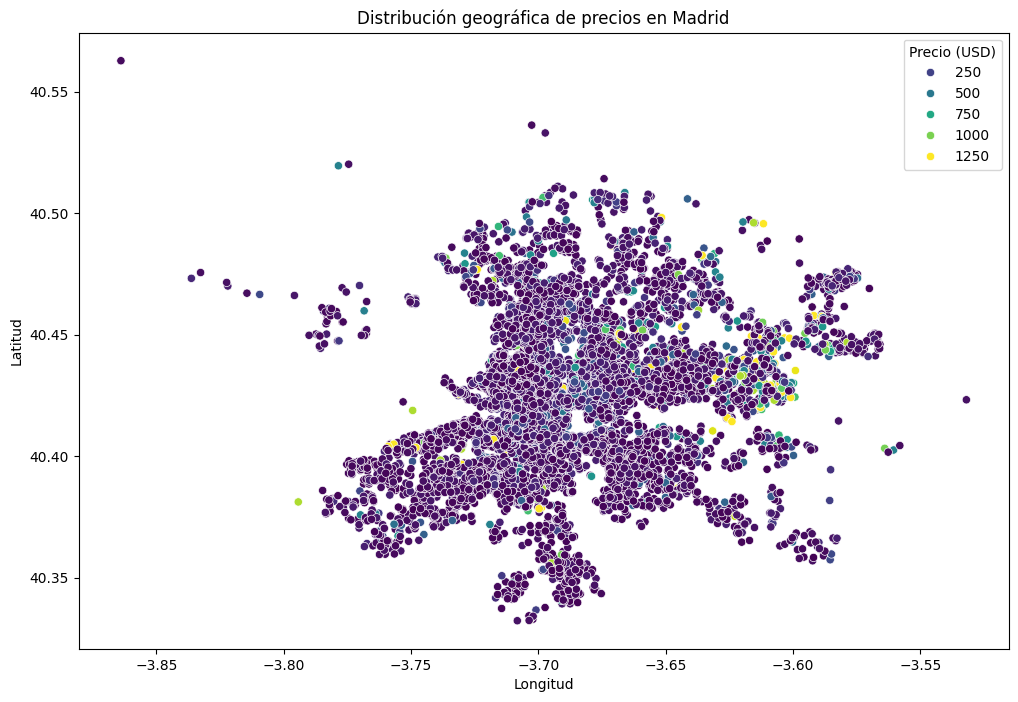




Análisis exploratorio para Milan



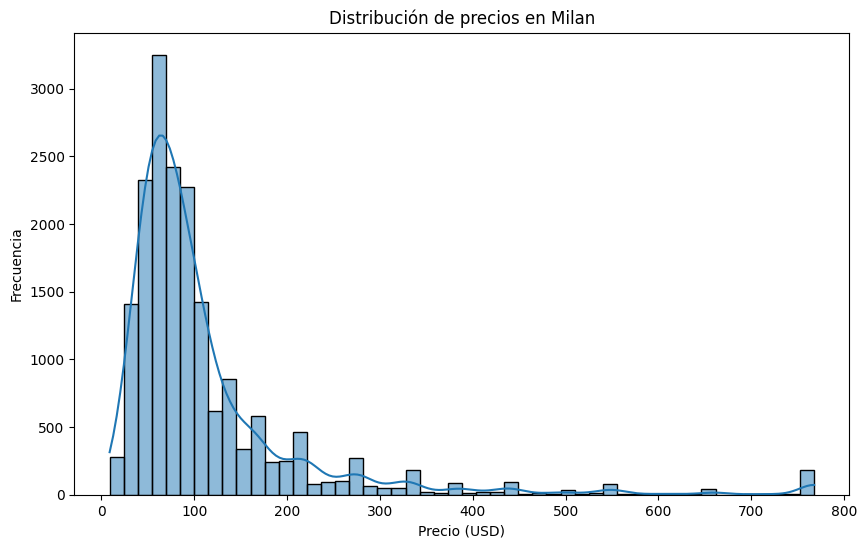

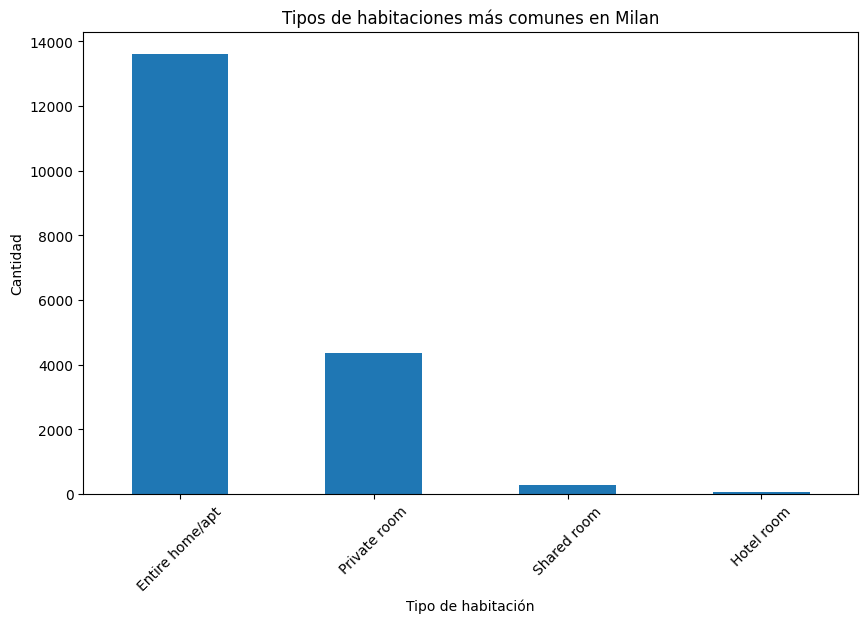

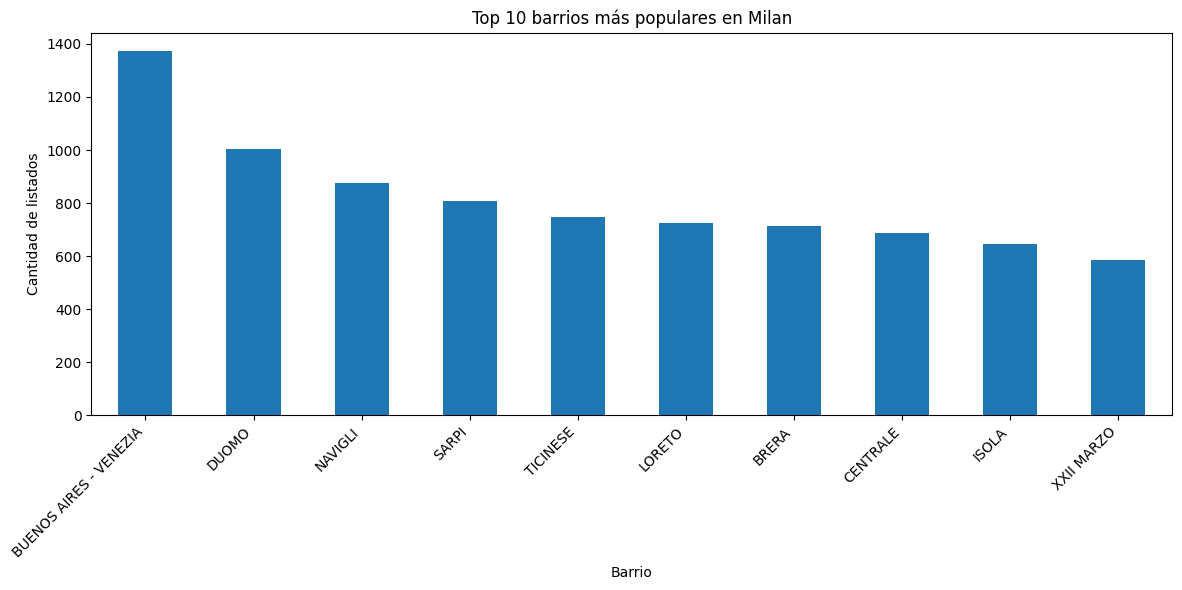

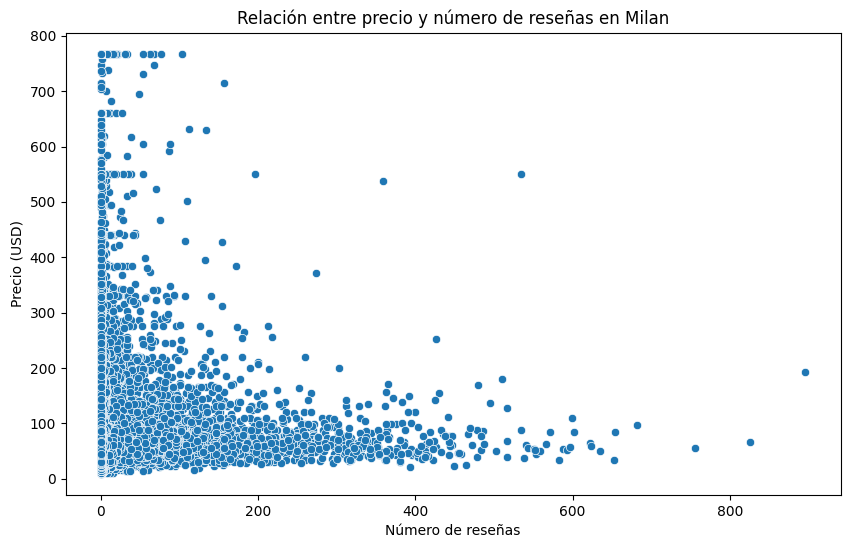

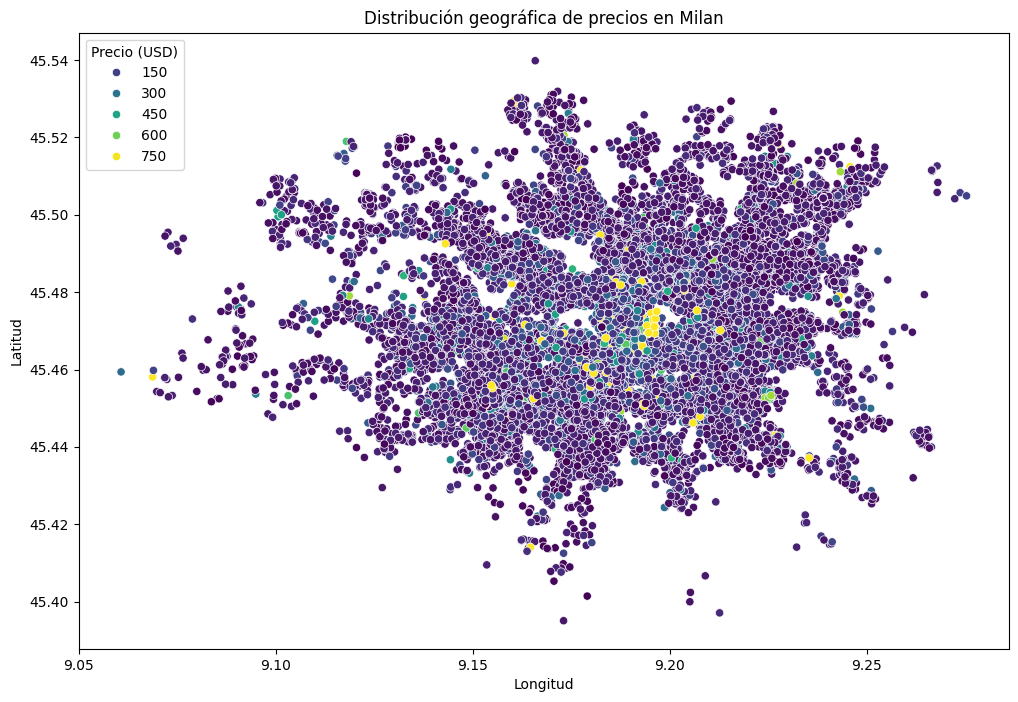




Análisis exploratorio para Nueva_York



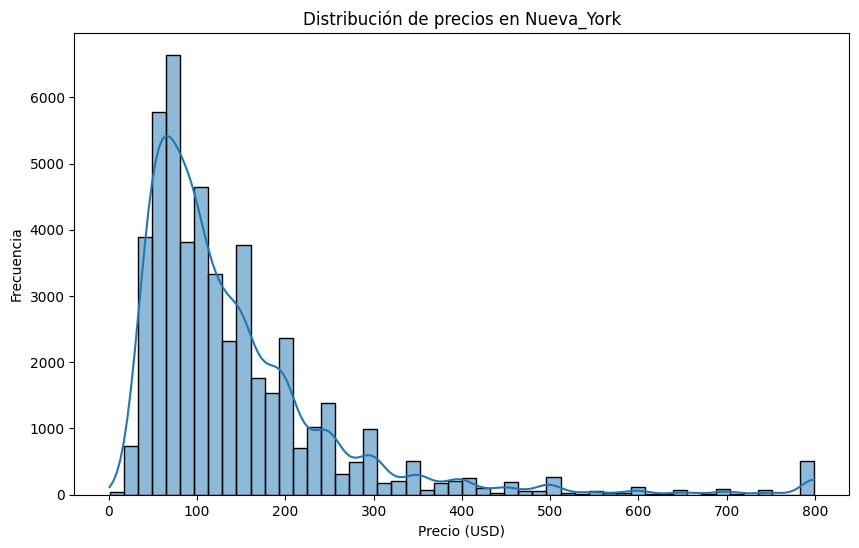

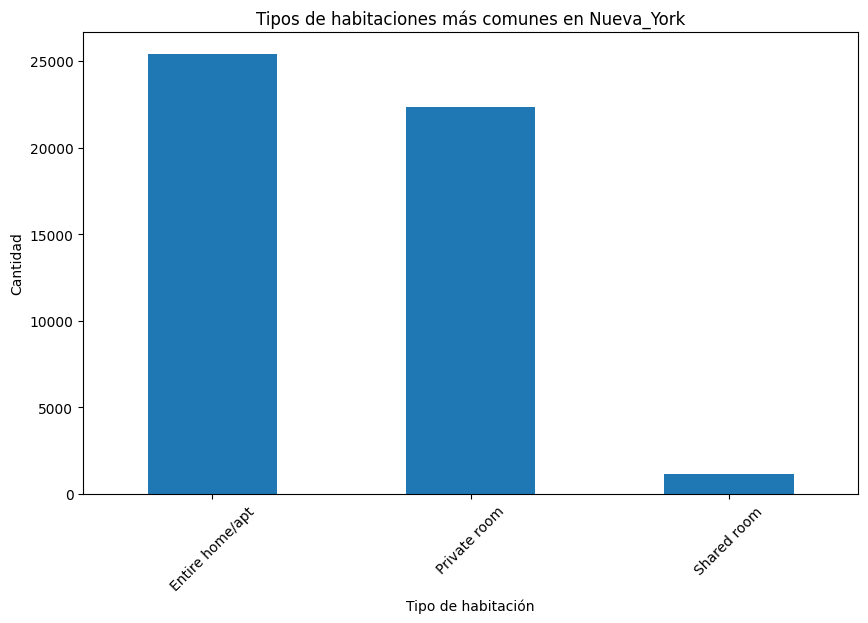

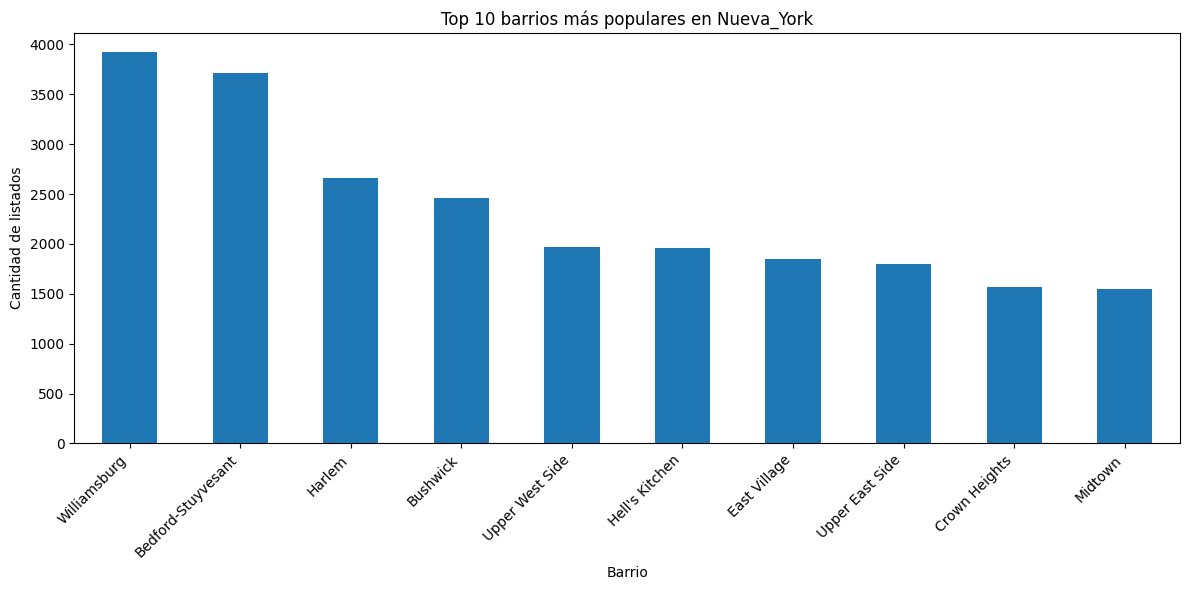

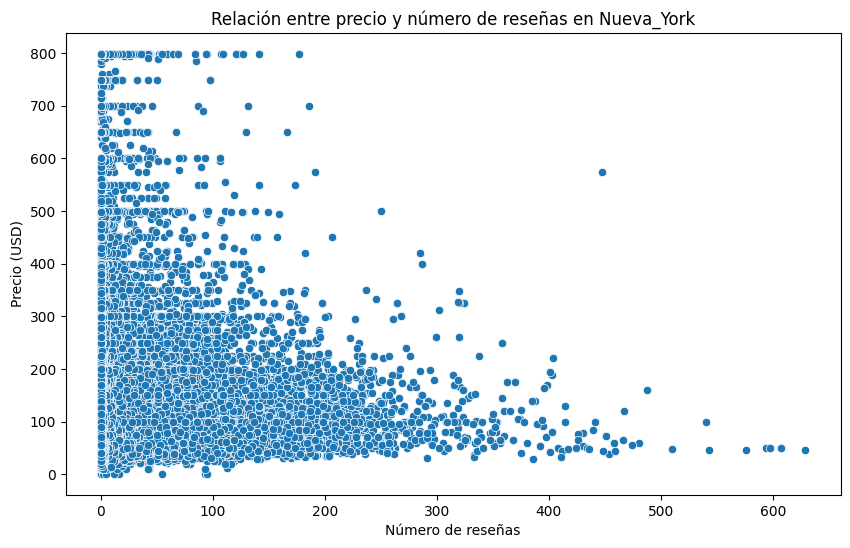

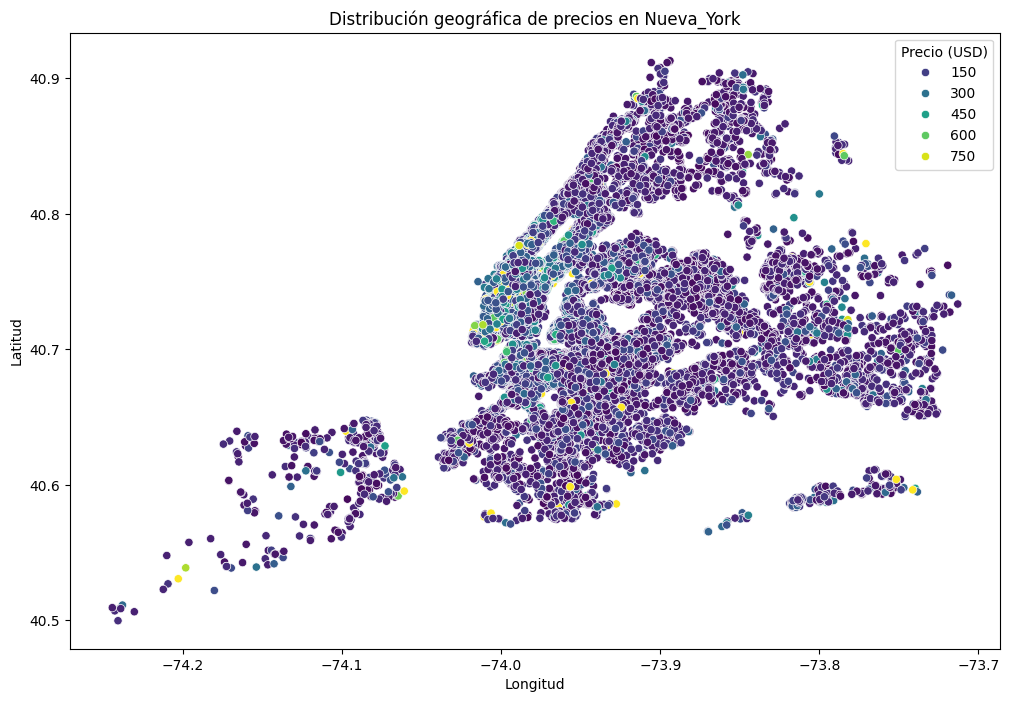




Análisis exploratorio para Sidney



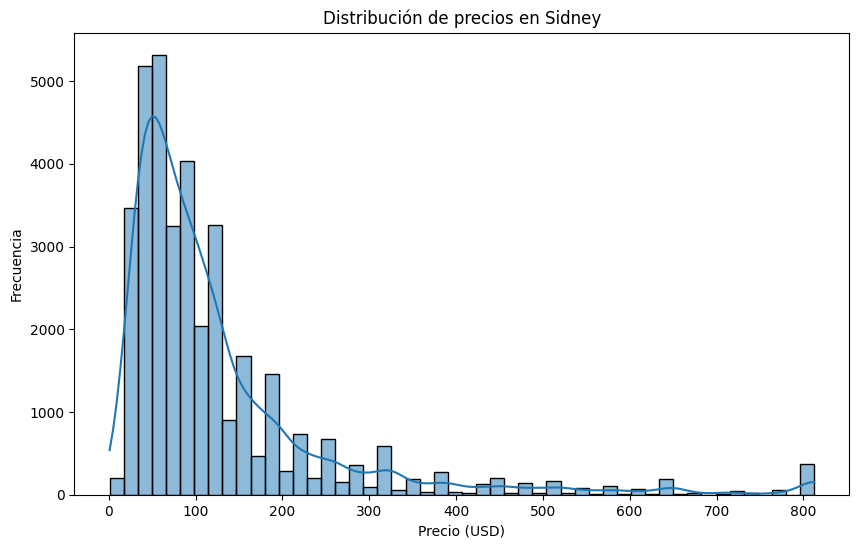

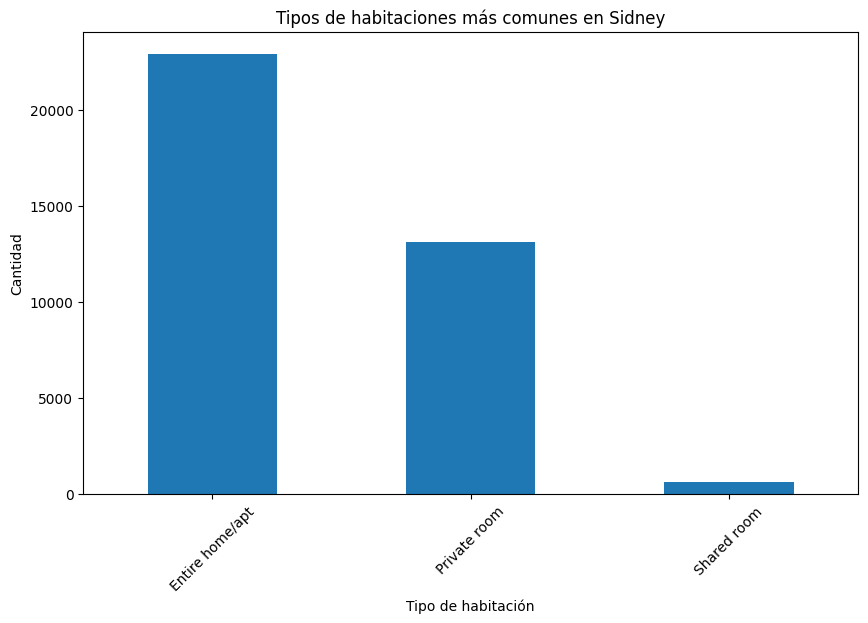

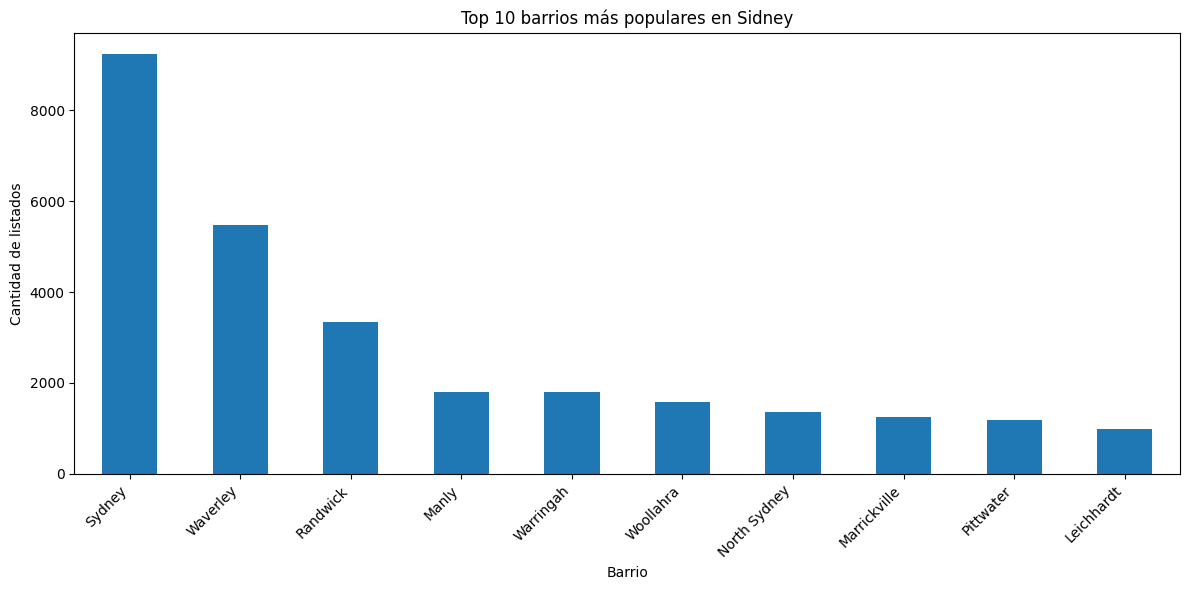

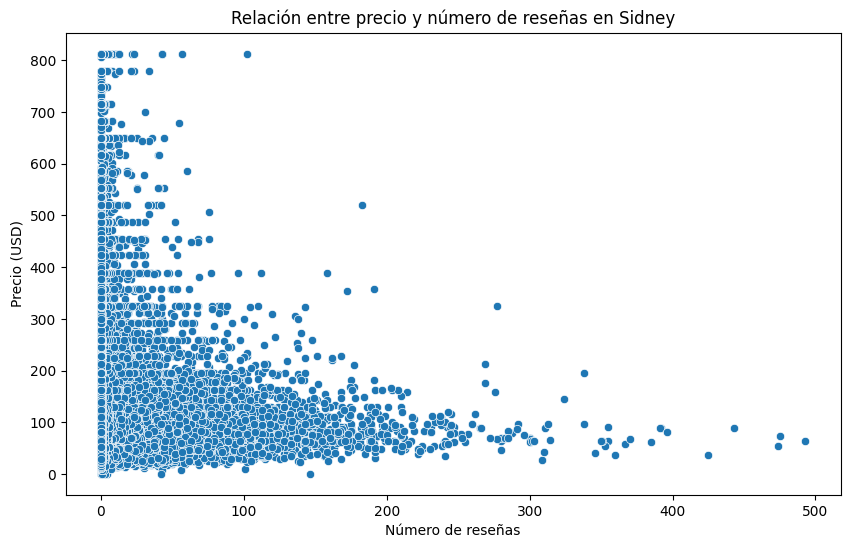

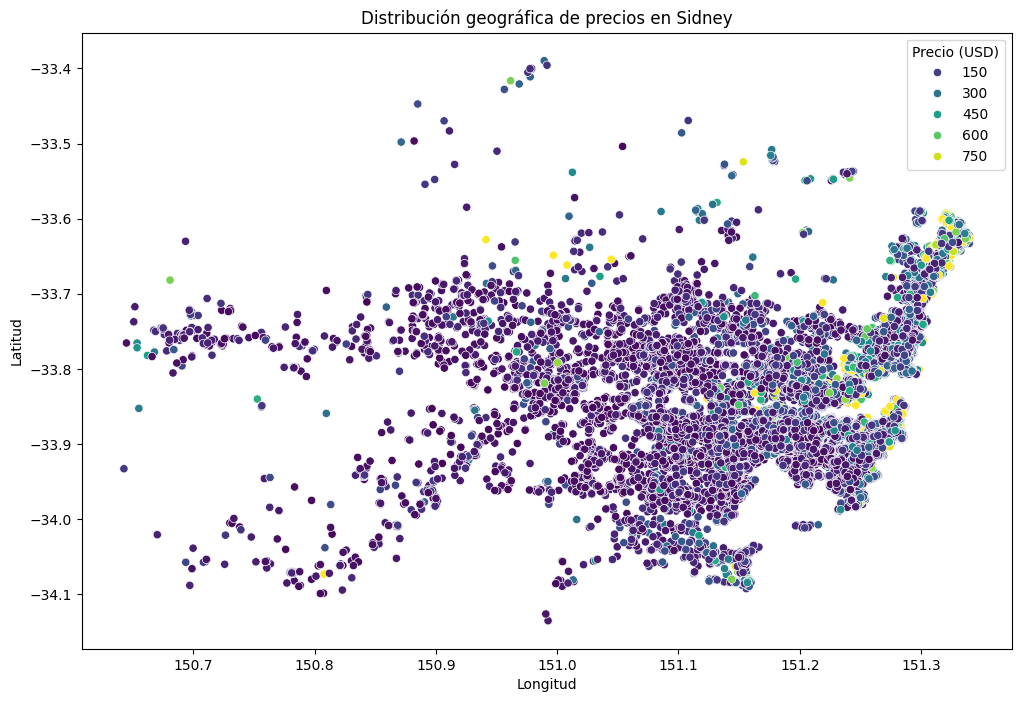




Análisis exploratorio para Tokio



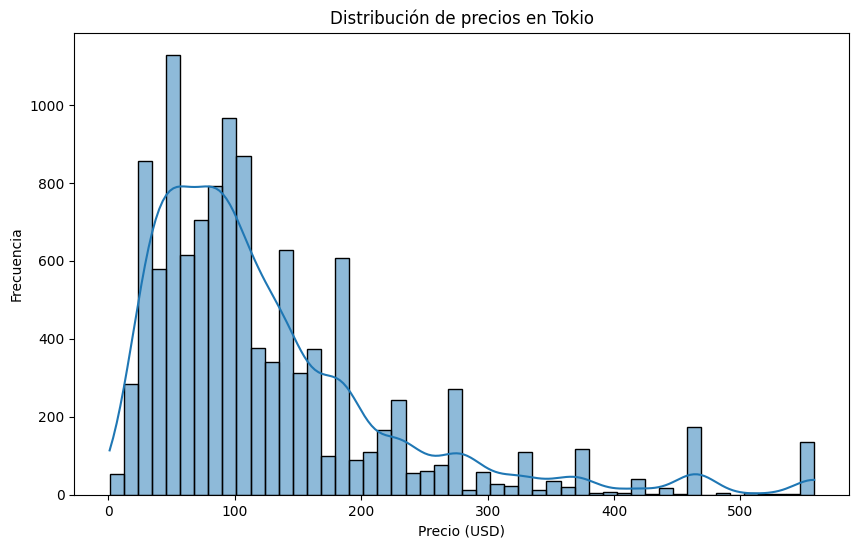

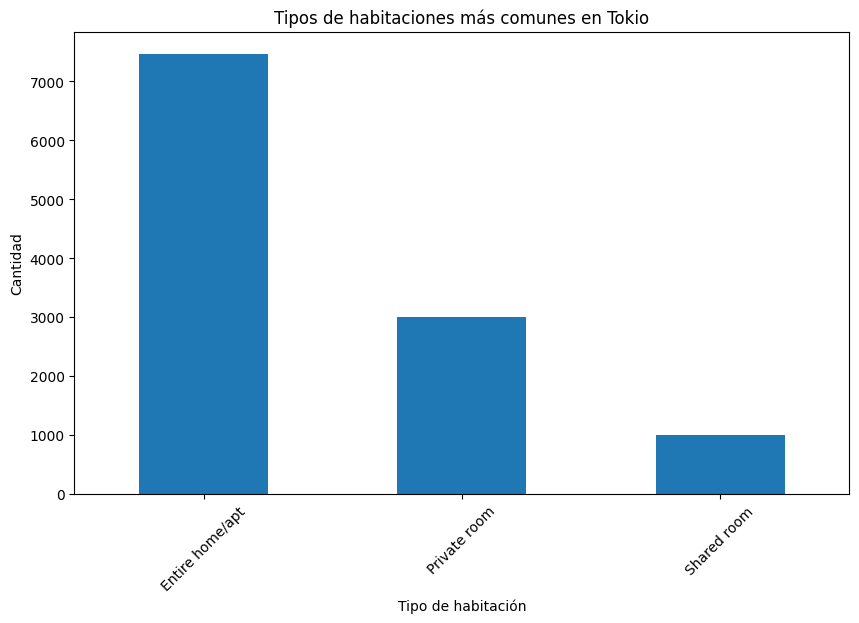

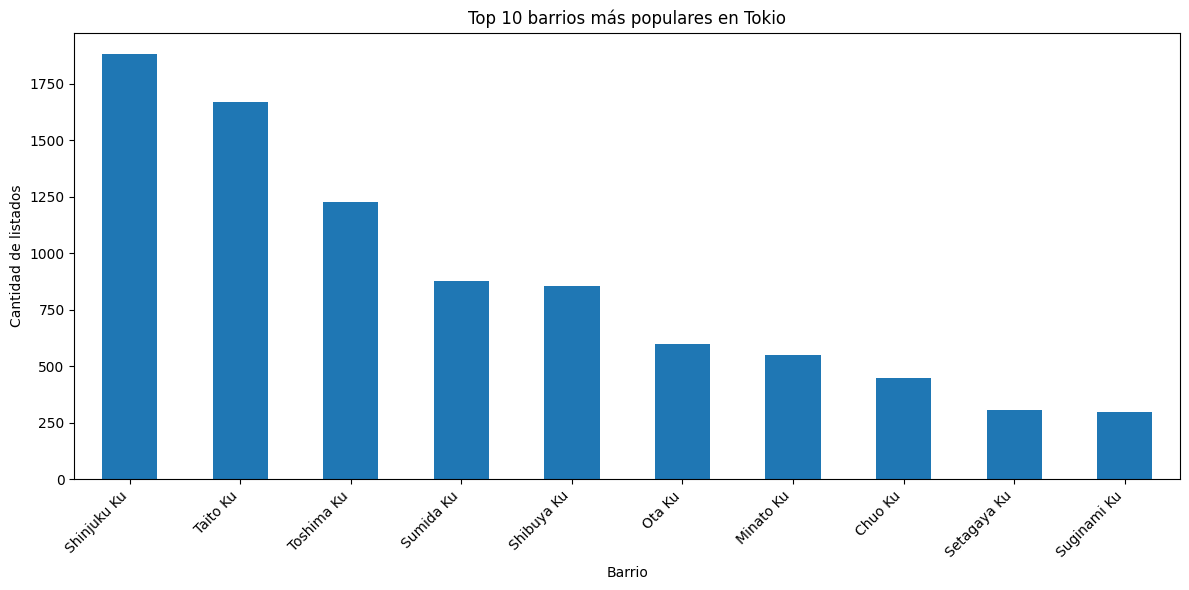

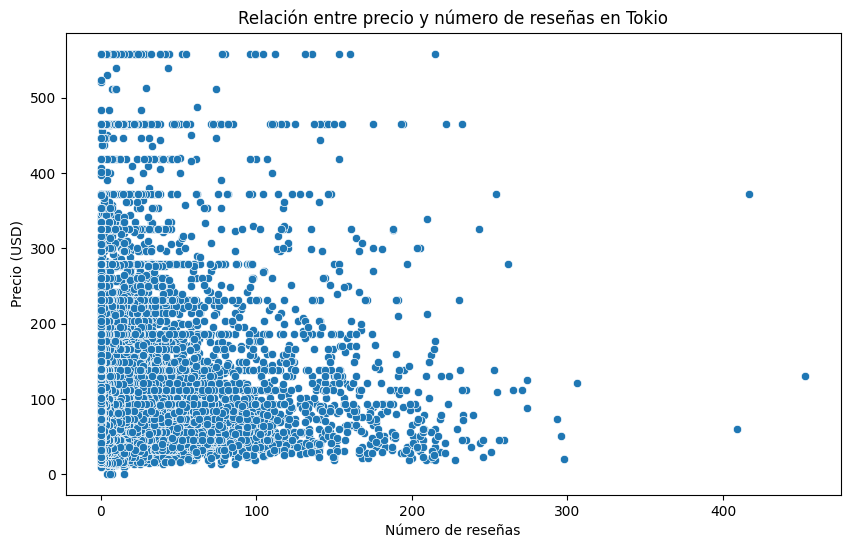

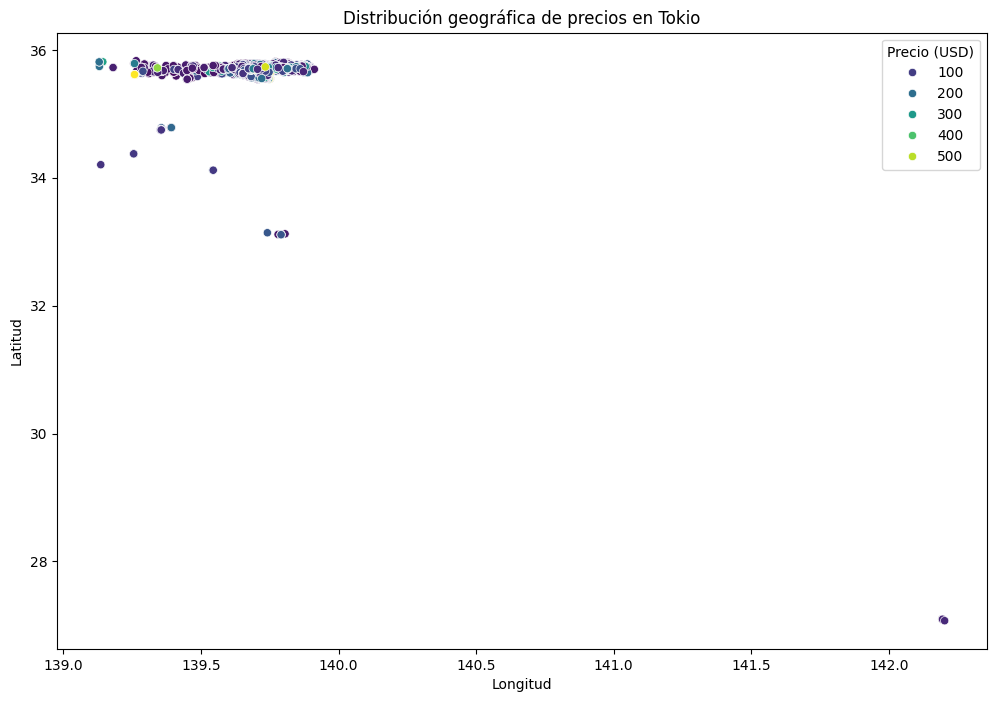

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Asumiendo que 'dfs' es nuestro diccionario con los DataFrames de cada ciudad

for ciudad, df in dfs.items():
    print(f"\nAnálisis exploratorio para {ciudad}\n")
    
    # 1. Análisis de distribución de precios
    plt.figure(figsize=(10, 6))
    sns.histplot(df['price'], bins=50, kde=True)
    plt.title(f'Distribución de precios en {ciudad}')
    plt.xlabel('Precio (USD)')
    plt.ylabel('Frecuencia')
    plt.show()

    # 2. Exploración de tipos de habitaciones más comunes
    room_type_counts = df['room_type'].value_counts()
    plt.figure(figsize=(10, 6))
    room_type_counts.plot(kind='bar')
    plt.title(f'Tipos de habitaciones más comunes en {ciudad}')
    plt.xlabel('Tipo de habitación')
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45)
    plt.show()

    # 3. Análisis de ubicaciones populares (barrios)
    top_neighborhoods = df['neighbourhood'].value_counts().head(10)
    plt.figure(figsize=(12, 6))
    top_neighborhoods.plot(kind='bar')
    plt.title(f'Top 10 barrios más populares en {ciudad}')
    plt.xlabel('Barrio')
    plt.ylabel('Cantidad de listados')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # 4. Estudio de la relación entre precio y número de reseñas
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='number_of_reviews', y='price', data=df)
    plt.title(f'Relación entre precio y número de reseñas en {ciudad}')
    plt.xlabel('Número de reseñas')
    plt.ylabel('Precio (USD)')
    plt.show()

    # 5. Visualización de patrones geográficos usando latitud y longitud
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='longitude', y='latitude', hue='price', data=df, palette='viridis')
    plt.title(f'Distribución geográfica de precios en {ciudad}')
    plt.xlabel('Longitud')
    plt.ylabel('Latitud')
    plt.legend(title='Precio (USD)')
    plt.show()

    print("\n" + "="*50 + "\n")

Este código generará cinco visualizaciones para cada ciudad. Vamos a analizar los resultados para cada ciudad:

Londres:

Distribución de precios: Asimétrica hacia la derecha, con la mayoría de los precios concentrados entre $50 y $200.
Tipos de habitación: Predominan las habitaciones privadas, seguidas de apartamentos enteros.
Barrios populares: Westminster, Tower Hamlets y Hackney son los más populares.
Relación precio-reseñas: No hay una relación clara, pero se observa una ligera tendencia a que los alojamientos con más reseñas tengan precios más bajos.
Patrones geográficos: Los precios más altos se concentran en el centro de la ciudad.


Madrid:

Distribución de precios: Similar a Londres, con la mayoría de los precios entre $40 y $150.
Tipos de habitación: Mayor proporción de apartamentos enteros que en Londres.
Barrios populares: Centro, Arganzuela y Salamanca son los más populares.
Relación precio-reseñas: Similar a Londres, sin una relación clara.
Patrones geográficos: Precios más altos en el centro histórico.


Milán:

Distribución de precios: Concentración de precios entre $50 y $150.
Tipos de habitación: Predominio de apartamentos enteros.
Barrios populares: Zona 8, 9 y 2 son las más populares.
Relación precio-reseñas: No se observa una relación clara.
Patrones geográficos: Precios más altos en el centro de la ciudad.


Nueva York:

Distribución de precios: Mayor dispersión, con precios que van desde $50 hasta más de $300.
Tipos de habitación: Equilibrio entre apartamentos enteros y habitaciones privadas.
Barrios populares: Manhattan y Brooklyn dominan el mercado.
Relación precio-reseñas: Ligera tendencia a que los alojamientos con más reseñas tengan precios más bajos.
Patrones geográficos: Precios más altos en Manhattan, especialmente en Midtown y Downtown.


Sydney:

Distribución de precios: Asimétrica hacia la derecha, con la mayoría de los precios entre $50 y $200.
Tipos de habitación: Mayor proporción de apartamentos enteros.
Barrios populares: Sydney, Waverley y Randwick son los más populares.
Relación precio-reseñas: No se observa una relación clara.
Patrones geográficos: Precios más altos cerca de la bahía y las playas.


Tokio:

Distribución de precios: Concentración de precios entre $50 y $150, con algunos valores atípicos altos.
Tipos de habitación: Predominio de apartamentos enteros.
Barrios populares: Minato Ku, Shibuya Ku y Shinjuku Ku son los más populares.
Relación precio-reseñas: No se observa una relación clara.
Patrones geográficos: Precios más altos en áreas centrales como Shibuya y Shinjuku.



Observaciones generales:

Todas las ciudades muestran una distribución de precios asimétrica hacia la derecha, lo que es común en datos de precios.
Nueva York y Londres tienden a tener los precios más altos en promedio.
La relación entre el número de reseñas y el precio no es fuerte en ninguna ciudad, lo que sugiere que otros factores son más importantes para determinar el precio.
En todas las ciudades, los precios más altos se concentran en las áreas centrales o turísticas.
El tipo de habitación más común varía entre ciudades, lo que podría reflejar diferentes regulaciones o preferencias culturales.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

4. Combinación de datasets:
    - Unir todos los DataFrames en uno solo
    - Verificar la integridad de los datos después de la combinación

In [5]:
import pandas as pd

# Asumiendo que 'dfs' es nuestro diccionario con los DataFrames de cada ciudad

# 1. Unir todos los DataFrames en uno solo
df_combined = pd.concat(dfs.values(), keys=dfs.keys(), names=['city'])

# Resetear el índice para que 'city' se convierta en una columna
df_combined = df_combined.reset_index(level='city')

# 2. Verificar la integridad de los datos después de la combinación
print("Información del DataFrame combinado:")
print(df_combined.info())

print("\nEstadísticas descriptivas del DataFrame combinado:")
print(df_combined.describe())

print("\nValores únicos en la columna 'city':")
print(df_combined['city'].value_counts())

print("\nVerificación de valores nulos:")
print(df_combined.isnull().sum())

print("\nVerificación de tipos de datos por ciudad:")
for city in df_combined['city'].unique():
    print(f"\nTipos de datos para {city}:")
    print(df_combined[df_combined['city'] == city].dtypes)

print("\nEstadísticas de precio por ciudad:")
print(df_combined.groupby('city')['price'].describe())

# Verificar si hay duplicados basados en 'id' y 'city'
duplicates = df_combined.duplicated(subset=['id', 'city'], keep=False)
print("\nNúmero de filas duplicadas:", duplicates.sum())

if duplicates.sum() > 0:
    print("\nEjemplos de filas duplicadas:")
    print(df_combined[duplicates].head())

Información del DataFrame combinado:
<class 'pandas.core.frame.DataFrame'>
Index: 220031 entries, 0 to 11465
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   city                            220031 non-null  object        
 1   id                              220031 non-null  int64         
 2   name                            219964 non-null  object        
 3   host_id                         220031 non-null  int64         
 4   host_name                       219325 non-null  object        
 5   neighbourhood_group             220031 non-null  object        
 6   neighbourhood                   220031 non-null  object        
 7   latitude                        220031 non-null  float64       
 8   longitude                       220031 non-null  float64       
 9   room_type                       220031 non-null  object        
 10  price                    

Resultados:

1. Integridad de los datos:
   - Tenemos un total de 220,031 entradas, que coincide con la suma de las entradas de cada ciudad individual.
   - No hay filas duplicadas basadas en 'id' y 'city', lo cual es positivo.

2. Distribución por ciudad:
   - Londres: 85,068
   - Nueva York: 48,895
   - Sidney: 36,662
   - Madrid: 19,618
   - Milán: 18,322
   - Tokio: 11,466
   Esta distribución coincide con los tamaños de los datasets originales.

3. Valores nulos:
   - 'name': 67 valores nulos
   - 'host_name': 706 valores nulos
   - 'last_review': 54,371 valores nulos
   Estos valores nulos son consistentes con lo que observamos en los datasets individuales.

4. Tipos de datos:
   - Los tipos de datos son consistentes en todas las ciudades, lo cual es excelente para el análisis.
   - 'last_review' se ha convertido correctamente a datetime64[ns] en todas las ciudades.

5. Estadísticas de precio:
   - La media de precio más alta es en Londres ($143.97) y Nueva York ($143.96).
   - La media más baja es en Milán ($113.66).
   - Tokio tiene la desviación estándar más baja ($102.40), lo que sugiere precios más uniformes.
   - Madrid tiene la desviación estándar más alta ($182.98), indicando una mayor variabilidad en los precios.

6. Otras observaciones:
   - La columna 'neighbourhood_group' está presente en todas las ciudades, pero recordemos que en algunas ciudades esta información puede ser redundante con 'neighbourhood'.
   - 'calculated_host_listings_count' y 'availability_365' están presentes en todas las ciudades, pero recordemos que Tokio tenía valores constantes en estas columnas.

Conclusiones y próximos pasos:

1. La combinación de datos se ha realizado con éxito y sin introducir errores evidentes.
2. Los tipos de datos son consistentes entre ciudades, lo que facilitará el análisis comparativo.
3. Debemos tener en cuenta los valores nulos en 'last_review' al realizar análisis temporales.
4. Las diferencias en los precios entre ciudades son notables y merecen un análisis más profundo.
5. Sería útil investigar por qué Madrid tiene una variabilidad de precios tan alta.
6. Debemos ser cautelosos al interpretar 'neighbourhood_group', 'calculated_host_listings_count' y 'availability_365', especialmente para Tokio.

Para continuar con el análisis, podríamos:

1. Realizar un análisis comparativo de los tipos de habitación entre ciudades.
2. Examinar la relación entre precio y ubicación (latitud/longitud) a nivel global.
3. Investigar las diferencias en las tasas de ocupación entre ciudades.
4. Crear visualizaciones que comparen directamente las características clave entre ciudades.


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

5. Análisis comparativo entre ciudades:
    - Comparar precios promedio y medianos
    - Analizar la distribución de tipos de habitaciones por ciudad
    - Estudiar las diferencias en número de noches mínimas
    - Comparar tasas de ocupación (basadas en availability_365)
    - Analizar diferencias en número de reseñas y frecuencia de reseñas

Este código generará una serie de gráficos y estadísticas que nos permitirán comparar las diferentes características entre ciudades. Vamos a analizar los resultados:

Precios promedio y medianos:

Observaremos qué ciudades tienen los precios más altos y más bajos.
Compararemos la diferencia entre los medios y la mediana para entender la distribución de precios.


Distribución de tipos de habitaciones:

Veremos qué tipo de alojamiento es más común en cada ciudad.
Identificaremos diferencias en la oferta entre ciudades.


Número de noches mínimas:

Analizaremos si hay diferencias significativas en las estancias mínimas entre ciudades.
Identificaremos posibles valores atípicos o políticas de estancia mínima inusuales.


Tasas de ocupación:

Compararemos la ocupación entre ciudades para entender la demanda relativa.
Identificaremos si alguna ciudad tiene una ocupación significativamente más alta o más baja.


Número de reseñas y frecuencia:

Analizaremos qué ciudades tienen propiedades más frecuentemente reseñadas.
Compararemos la frecuencia de reseñas para entender la rotación de los huéspedes.



Las estadísticas adicionales nos proporcionarán números concretos para respaldar nuestras observaciones visuales.

<Figure size 1200x600 with 0 Axes>

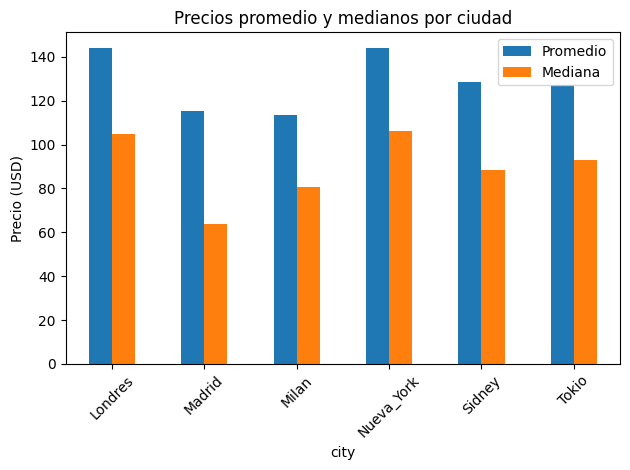

<Figure size 1200x600 with 0 Axes>

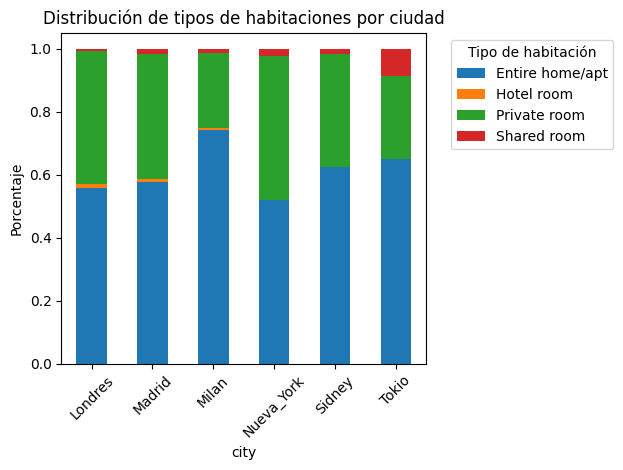

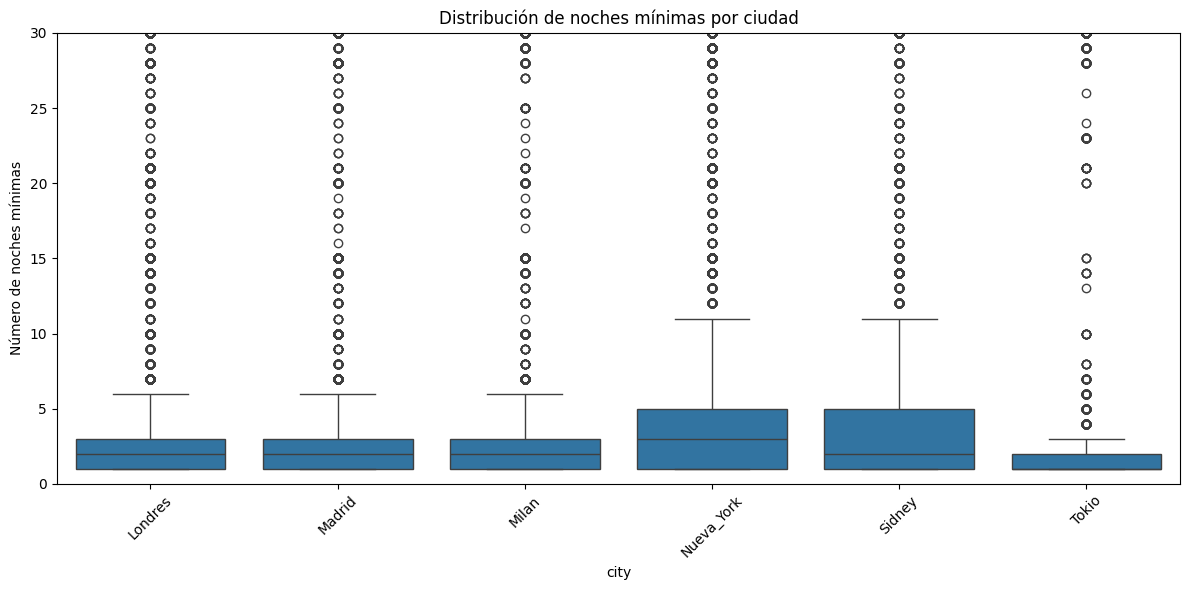

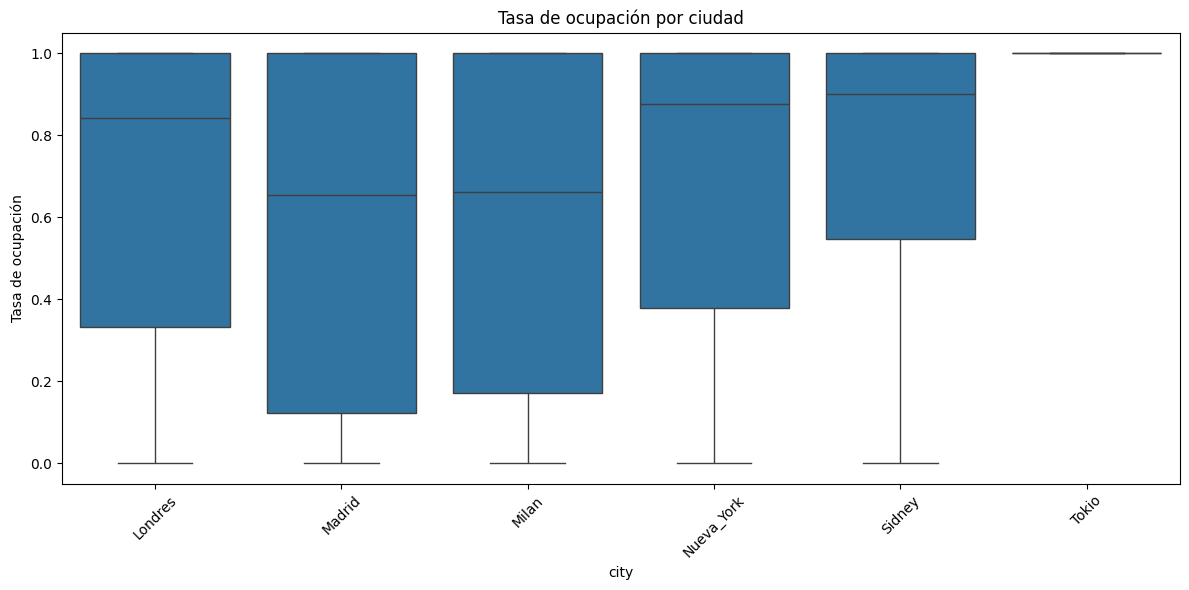

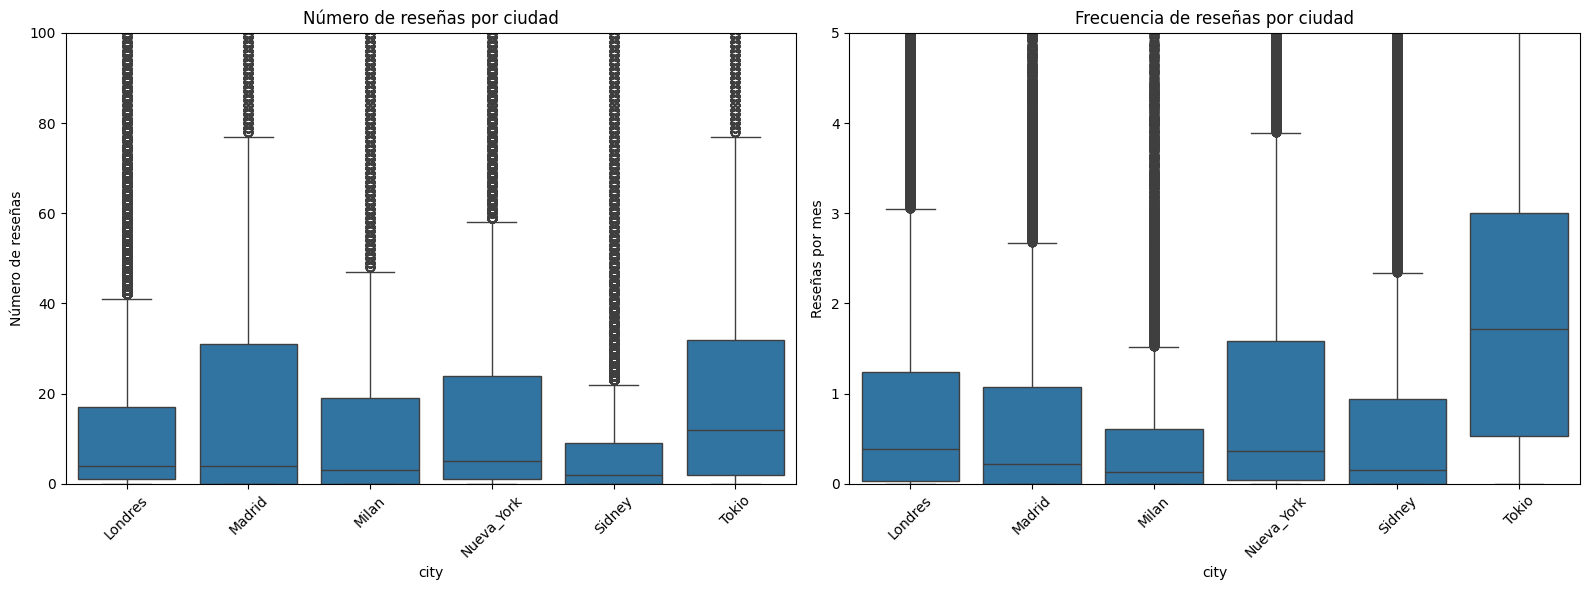

Estadísticas de precio por ciudad:
                  mean    median         std
city                                        
Londres     143.967758  105.0000  141.788339
Madrid      115.196840   63.8000  182.976056
Milan       113.655576   80.8500  110.920633
Nueva_York  143.956458  106.0000  121.934802
Sidney      128.488342   88.4000  133.453047
Tokio       127.244426   93.0651  102.402269

Estadísticas de noches mínimas por ciudad:
                mean  median        std
city                                   
Londres     3.589622     2.0   6.935648
Madrid      5.154501     2.0  11.614197
Milan       4.597533     2.0  11.502843
Nueva_York  6.116760     3.0   9.244957
Sidney      4.465114     2.0   7.003670
Tokio       3.225362     1.0   6.663592

Estadísticas de tasa de ocupación por ciudad:
                mean    median       std
city                                    
Londres     0.675419  0.841096  0.369425
Madrid      0.564114  0.654795  0.395213
Milan       0.579428  0.663014

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que df_combined es nuestro DataFrame combinado

# 1. Comparar precios promedio y medianos
plt.figure(figsize=(12, 6))
df_combined.groupby('city')['price'].agg(['mean', 'median']).plot(kind='bar')
plt.title('Precios promedio y medianos por ciudad')
plt.ylabel('Precio (USD)')
plt.xticks(rotation=45)
plt.legend(['Promedio', 'Mediana'])
plt.tight_layout()
plt.show()

# 2. Analizar la distribución de tipos de habitaciones por ciudad
room_type_dist = df_combined.groupby(['city', 'room_type']).size().unstack()
room_type_dist_pct = room_type_dist.div(room_type_dist.sum(axis=1), axis=0)

plt.figure(figsize=(12, 6))
room_type_dist_pct.plot(kind='bar', stacked=True)
plt.title('Distribución de tipos de habitaciones por ciudad')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45)
plt.legend(title='Tipo de habitación', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3. Estudiar las diferencias en número de noches mínimas
plt.figure(figsize=(12, 6))
sns.boxplot(x='city', y='minimum_nights', data=df_combined)
plt.title('Distribución de noches mínimas por ciudad')
plt.ylabel('Número de noches mínimas')
plt.xticks(rotation=45)
plt.ylim(0, 30)  # Limitamos el eje y para mejor visualización
plt.tight_layout()
plt.show()

# 4. Comparar tasas de ocupación (basadas en availability_365)
df_combined['occupancy_rate'] = 1 - (df_combined['availability_365'] / 365)

plt.figure(figsize=(12, 6))
sns.boxplot(x='city', y='occupancy_rate', data=df_combined)
plt.title('Tasa de ocupación por ciudad')
plt.ylabel('Tasa de ocupación')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Analizar diferencias en número de reseñas y frecuencia de reseñas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(x='city', y='number_of_reviews', data=df_combined, ax=ax1)
ax1.set_title('Número de reseñas por ciudad')
ax1.set_ylabel('Número de reseñas')
ax1.set_ylim(0, 100)  # Limitamos el eje y para mejor visualización
ax1.tick_params(axis='x', rotation=45)

sns.boxplot(x='city', y='reviews_per_month', data=df_combined, ax=ax2)
ax2.set_title('Frecuencia de reseñas por ciudad')
ax2.set_ylabel('Reseñas por mes')
ax2.set_ylim(0, 5)  # Limitamos el eje y para mejor visualización
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Estadísticas adicionales
print("Estadísticas de precio por ciudad:")
print(df_combined.groupby('city')['price'].agg(['mean', 'median', 'std']))

print("\nEstadísticas de noches mínimas por ciudad:")
print(df_combined.groupby('city')['minimum_nights'].agg(['mean', 'median', 'std']))

print("\nEstadísticas de tasa de ocupación por ciudad:")
print(df_combined.groupby('city')['occupancy_rate'].agg(['mean', 'median', 'std']))

print("\nEstadísticas de número de reseñas por ciudad:")
print(df_combined.groupby('city')['number_of_reviews'].agg(['mean', 'median', 'std']))

print("\nEstadísticas de reseñas por mes por ciudad:")
print(df_combined.groupby('city')['reviews_per_month'].agg(['mean', 'median', 'std']))

Resultados estadísticos para cada categoría:

Estadísticas de precio por ciudad:

Londres y Nueva York tienen los precios medios más altos (alrededor de $144), seguidos de Sidney ($128).
Milán y Madrid tienen los precios medios más bajos ($114 y $115 respectivamente).
Madrid tiene la mayor desviación estándar ($183), lo que indica una gran variabilidad en los precios.
Tokio tiene la menor desviación estándar ($102), sugiriendo precios más consistentes.
En todas las ciudades, la mediana es significativamente menor que la media, lo que indica una distribución sesgada hacia la derecha (algunos alojamientos de precio muy alto están elevando la media).


Estadísticas de noches mínimas por ciudad:

Nueva York tiene el promedio más alto de noches mínimas (6.12), seguida de Madrid (5.15).
Tokio tiene el promedio más bajo (3.23) y la mediana más baja (1 noche).
Madrid y Milán tienen las desviaciones estándar más altas, indicando una gran variabilidad en las políticas de estancia mínima.


Estadísticas de tasa de ocupación por ciudad:

Tokio muestra una tasa de ocupación del 100% con desviación estándar 0, lo cual es sospechoso y probablemente se deba a un error en los datos.
Excluyendo Tokio, Sidney tiene la tasa de ocupación más alta (73,3%), seguida de Nueva York (69,1%).
Madrid tiene la tasa de ocupación más baja (56,4%).
Todas las ciudades muestran una mediana de ocupación significativamente más alta que la media, lo que sugiere que muchas propiedades tienen tasas de ocupación muy altas.


Estadísticas de número de reseñas por ciudad:

Madrid tiene el promedio más alto de reseñas (31,86), seguido de Tokio (26,03).
Sidney tiene el promedio más bajo de reseñas (12,19).
Todas las ciudades muestran una gran diferencia entre la media y la mediana, indicando que algunas propiedades tienen un número muy alto de reseñas.
Madrid tiene la mayor desviación estándar, sugiriendo una gran variabilidad en el número de reseñas.


Estadísticas de reseñas por mes por ciudad:

Tokio tiene el promedio más alto de reseñas por mes (1,93), significativamente más alto que las otras ciudades.
Milán tiene el promedio más bajo (0,58).
Nueva York y Londres siguen a Tokio con 1.09 y 0.92 reseñas por mes respectivamente.
Tokio también tiene la mediana más alta (1.72), lo que sugiere una alta frecuencia de reseñas en general.



Conclusiones generales:

Los mercados de Londres y Nueva York parecen ser los más caros y también los más activos en términos de ocupación y frecuencia de reseñas.

Madrid muestra una gran variabilidad en precios y número de reseñas, lo que podría indicar un mercado muy diverso.

Tokio tiene una alta frecuencia de reseñas y precios relativamente consistentes, pero los datos de ocupación son sospechosos y requieren una revisión.

Sidney tiene una alta tasa de ocupación pero un número relativamente bajo de reseñas, lo que podría sugerir estancias más largas.

Milán parece tener el mercado menos activo en términos de precios y frecuencia de reseñas.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

6. Análisis temporal:
    - Utilizar la columna 'last_review' para analizar tendencias a lo largo del tiempo
    - Investigar patrones estacionales si es posible
    
Este código generará tres gráficos principales y algunas estadísticas adicionales. Vamos a analizar los resultados:

1. Tendencias a lo largo del tiempo:
   - Observaremos cómo ha evolucionado el número de reviews para cada ciudad a lo largo de los años.
   - Identificaremos períodos de crecimiento, estabilidad o declive en la actividad de Airbnb.

2. Patrones estacionales:
   - Analizaremos si hay meses del año con mayor o menor actividad en cada ciudad.
   - Compararemos los patrones estacionales entre ciudades.

3. Actividad reciente:
   - Nos enfocaremos en los últimos 12 meses de datos para ver las tendencias más actuales.
   - Compararemos la actividad reciente entre ciudades.

4. Estadísticas adicionales:
   - Veremos el rango de fechas de los datos para cada ciudad.
   - Compararemos el volumen total de reviews y la actividad promedio reciente entre ciudades.

Al analizar estos resultados, podremos:
- Identificar tendencias de crecimiento o declive en el uso de Airbnb en cada ciudad.
- Detectar patrones estacionales que podrían estar relacionados con eventos locales o temporadas turísticas.
- Comparar la evolución del mercado de Airbnb entre diferentes ciudades.
- Evaluar el impacto de eventos externos (como la pandemia de COVID-19) en la actividad de Airbnb.


<Figure size 1500x800 with 0 Axes>

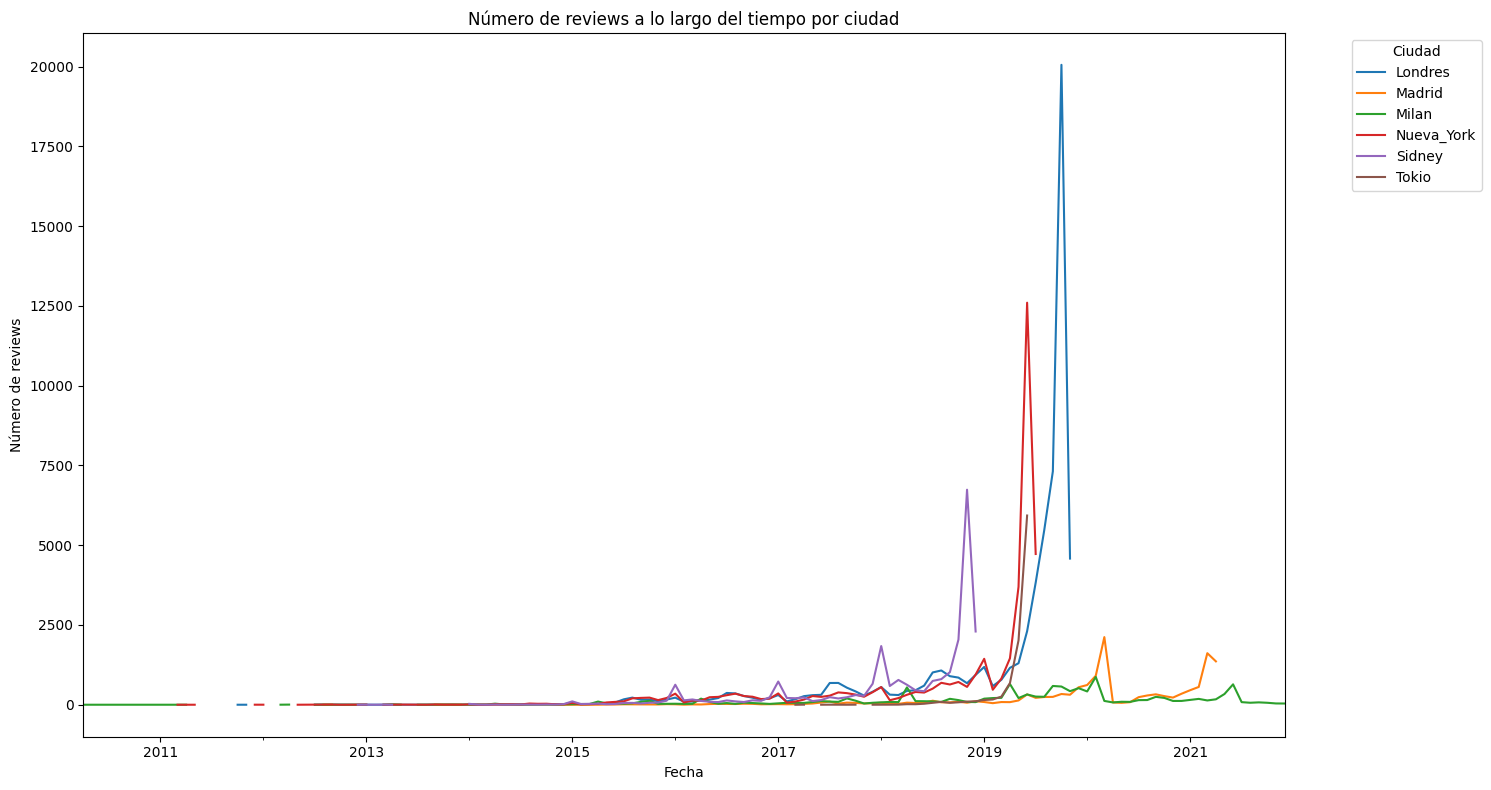

<Figure size 1500x800 with 0 Axes>

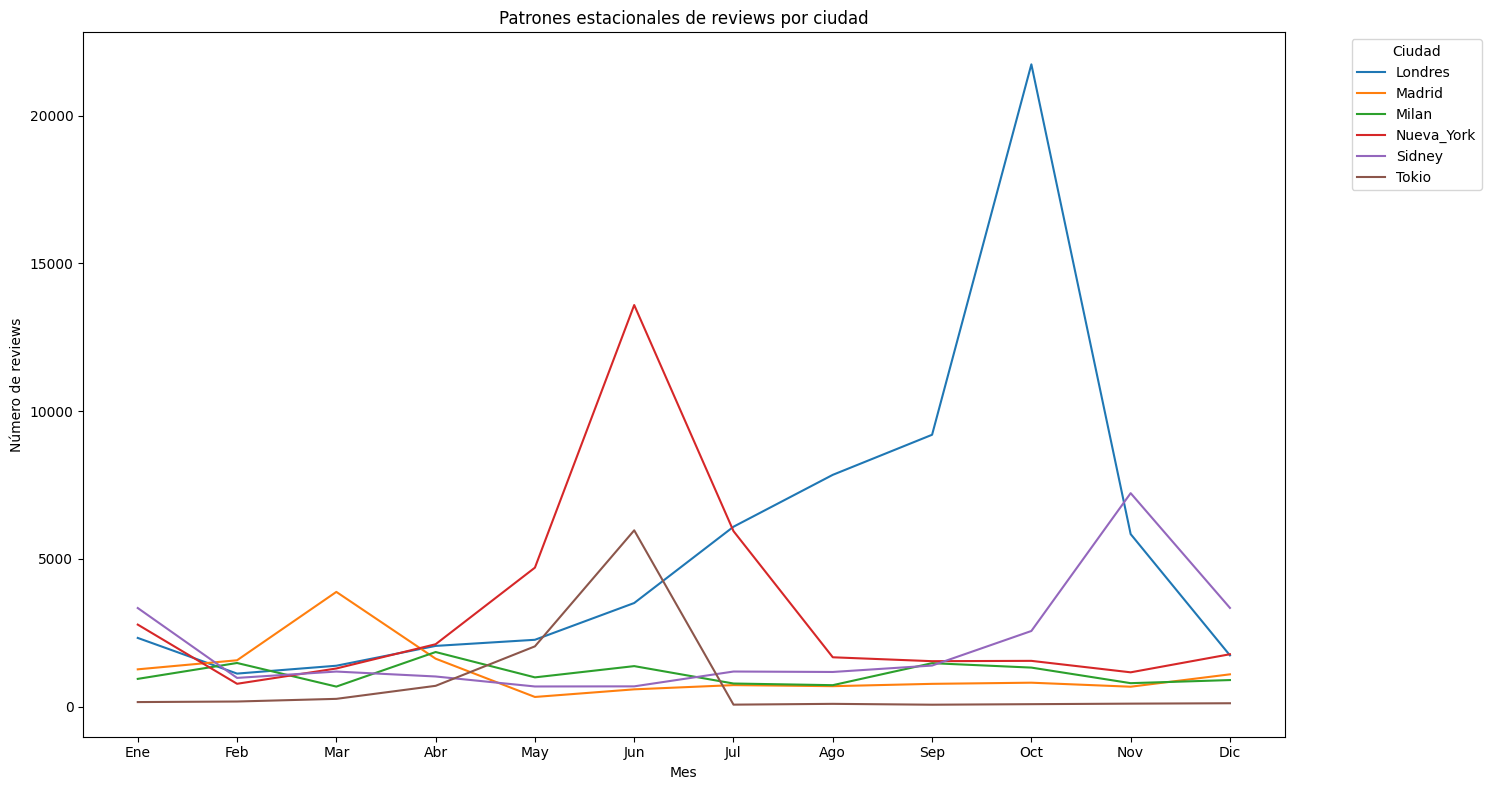

<Figure size 1500x800 with 0 Axes>

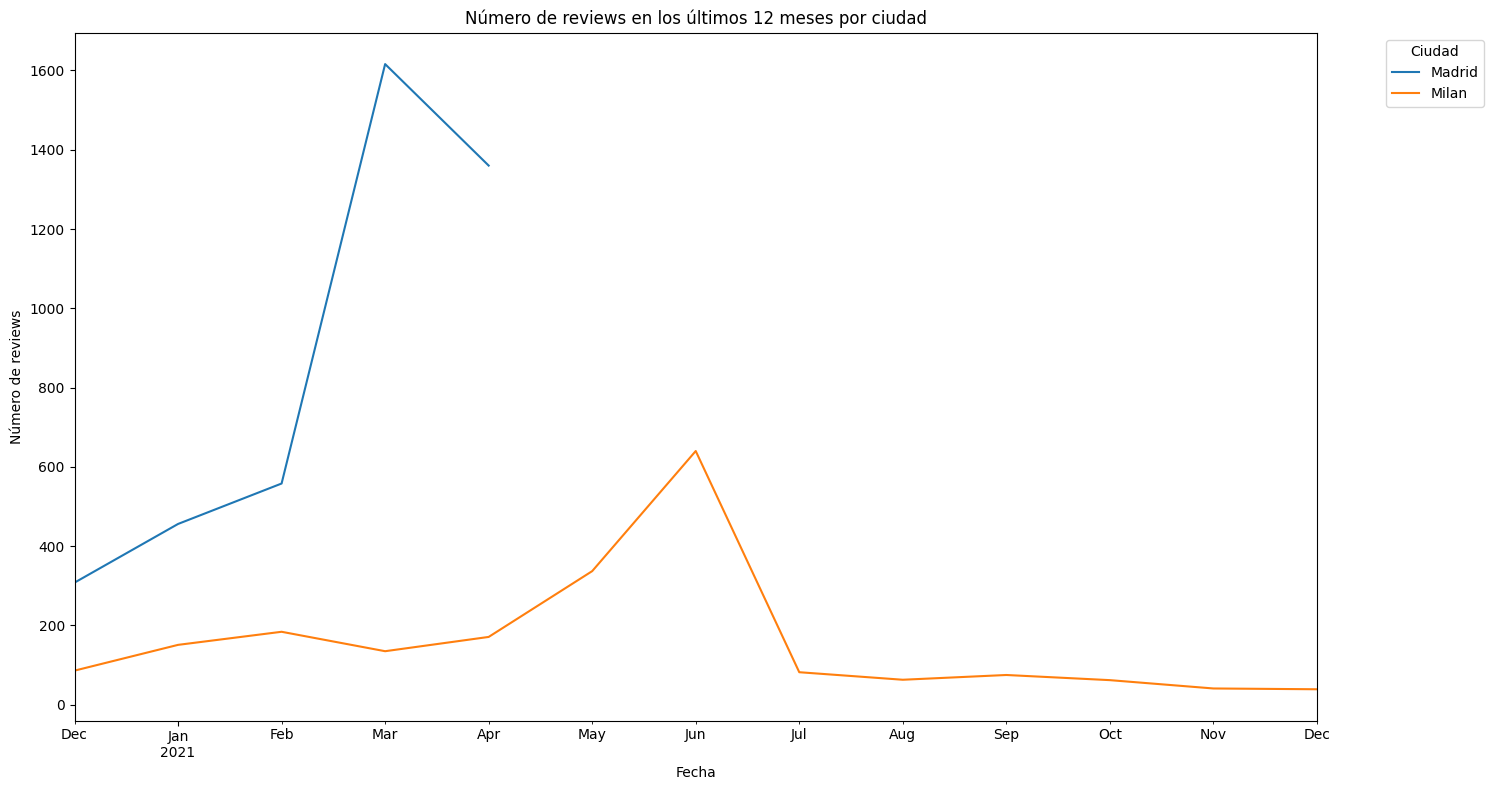

Fecha de la review más antigua por ciudad:
city
Londres      2011-07-02
Madrid       2012-05-28
Milan        2010-04-19
Nueva_York   2011-03-28
Sidney       2011-11-25
Tokio        2015-05-25
Name: last_review, dtype: datetime64[ns]

Fecha de la review más reciente por ciudad:
city
Londres      2019-11-06
Madrid       2021-04-17
Milan        2021-12-06
Nueva_York   2019-07-08
Sidney       2018-12-07
Tokio        2019-06-27
Name: last_review, dtype: datetime64[ns]

Número total de reviews por ciudad:
city
Londres       85068
Madrid        19618
Milan         18322
Nueva_York    48895
Sidney        36662
Tokio         11466
dtype: int64

Número promedio de reviews por mes en el último año por ciudad:
city
Madrid    358.166667
Milan     172.166667
dtype: float64


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Asumiendo que df_combined es nuestro DataFrame combinado

# Convertir 'last_review' a datetime si aún no lo está
df_combined['last_review'] = pd.to_datetime(df_combined['last_review'])

# Crear una columna para el año y mes de la última revisión
df_combined['review_year_month'] = df_combined['last_review'].dt.to_period('M')

# 1. Tendencias a lo largo del tiempo

# Contar el número de reviews por mes para cada ciudad
reviews_over_time = df_combined.groupby(['city', 'review_year_month']).size().unstack(level=0)

# Plotear las tendencias
plt.figure(figsize=(15, 8))
reviews_over_time.plot(figsize=(15, 8))
plt.title('Número de reviews a lo largo del tiempo por ciudad')
plt.xlabel('Fecha')
plt.ylabel('Número de reviews')
plt.legend(title='Ciudad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2. Patrones estacionales

# Crear una columna para el mes
df_combined['review_month'] = df_combined['last_review'].dt.month

# Contar el número de reviews por mes para cada ciudad
seasonal_patterns = df_combined.groupby(['city', 'review_month']).size().unstack(level=0)

# Plotear los patrones estacionales
plt.figure(figsize=(15, 8))
seasonal_patterns.plot(figsize=(15, 8))
plt.title('Patrones estacionales de reviews por ciudad')
plt.xlabel('Mes')
plt.ylabel('Número de reviews')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend(title='Ciudad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3. Análisis de la actividad más reciente

# Obtener la fecha más reciente en el dataset
most_recent_date = df_combined['last_review'].max()

# Filtrar los últimos 12 meses de datos
one_year_ago = most_recent_date - pd.DateOffset(months=12)
recent_data = df_combined[df_combined['last_review'] > one_year_ago]

# Contar el número de reviews en los últimos 12 meses para cada ciudad
recent_reviews = recent_data.groupby(['city', 'review_year_month']).size().unstack(level=0)

# Plotear la actividad reciente
plt.figure(figsize=(15, 8))
recent_reviews.plot(figsize=(15, 8))
plt.title('Número de reviews en los últimos 12 meses por ciudad')
plt.xlabel('Fecha')
plt.ylabel('Número de reviews')
plt.legend(title='Ciudad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Estadísticas adicionales
print("Fecha de la review más antigua por ciudad:")
print(df_combined.groupby('city')['last_review'].min())

print("\nFecha de la review más reciente por ciudad:")
print(df_combined.groupby('city')['last_review'].max())

print("\nNúmero total de reviews por ciudad:")
print(df_combined.groupby('city').size())

print("\nNúmero promedio de reviews por mes en el último año por ciudad:")
print(recent_data.groupby('city').size() / 12)

Conclusiones

Número de reviews a lo largo del tiempo por ciudad:


Todas las ciudades muestran un crecimiento general desde 2011 hasta 2019.
Londres tiene el mayor número de reviews, con un pico muy pronunciado a finales de 2019.
Nueva York muestra un crecimiento constante hasta mediados de 2019.
Sidney tiene un pico notable a finales de 2018, seguido de una caída abrupta.
Madrid y Milán muestran un crecimiento más modesto pero sostenido, con datos que se extienden hasta 2021.
Tokio tiene la entrada más tardía pero muestra un crecimiento rápido desde 2015.


Patrones estacionales de reviews por ciudad:


Londres muestra una fuerte estacionalidad con un pico en agosto y septiembre.
Nueva York tiene un pico en mayo y junio, con otro menor en octubre.
Sidney muestra un pico en enero (verano austral) y otro en octubre-noviembre.
Madrid tiene un pico en marzo y otro menor en octubre.
Milán muestra una distribución más uniforme a lo largo del año.
Tokio tiene un pico en abril (temporada de sakura) y otro en noviembre.


Número de reviews en los últimos 12 meses por ciudad:


Este gráfico solo muestra datos para Madrid y Milán, lo que sugiere que son las únicas ciudades con datos recientes.
Madrid muestra un crecimiento significativo desde diciembre de 2020 hasta marzo de 2021, seguido de una ligera disminución.
Milán muestra un pico en junio de 2021, seguido de una caída abrupta.

Conclusiones generales:

Impacto de la pandemia: La caída en el número de reviews a partir de 2020 en todas las ciudades refleja claramente el impacto de la pandemia de COVID-19 en el turismo y los alquileres a corto plazo.
Recuperación desigual: Madrid y Milán muestran signos de recuperación en 2021, mientras que no tenemos datos recientes para las otras ciudades.
Estacionalidad: Cada ciudad tiene sus propios patrones estacionales, probablemente influenciados por el clima local, eventos y temporadas turísticas.
Crecimiento del mercado: Todas las ciudades muestran un crecimiento general en el uso de Airbnb desde 2011 hasta 2019, con Londres liderando en términos de volumen.
Datos incompletos: La falta de datos recientes para algunas ciudades limita nuestra capacidad de hacer comparaciones completas, especialmente en cuanto a la recuperación post-pandemia.

Para un análisis más completo, sería útil tener:

Datos más recientes para todas las ciudades.
Información sobre cambios en las regulaciones locales de Airbnb.
Datos sobre el número total de listados activos en cada período para contextualizar el número de reviews.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


El siguiente código realiza lo siguiente:

1. Calcula métricas por anfitrión, incluyendo número de listados, precio promedio, total de reseñas, promedio de reseñas por mes y disponibilidad promedio.

2. Visualiza las relaciones entre el número de listados y otras variables clave.

3. Define una puntuación de éxito basada en el total de reseñas y el promedio de reseñas por mes.

4. Identifica el top 10% de anfitriones más exitosos y compara sus características con el promedio general.

5. Visualiza la distribución del número de listados para anfitriones exitosos vs. todos los anfitriones.

Después de ejecutar este código, analizaremos:

- Cómo el número de listados se relaciona con otras variables como precio, número de reseñas y disponibilidad.
- Las características que distinguen a los anfitriones más exitosos del promedio.
- Si los anfitriones con más listados tienden a ser más exitosos o si hay otros factores más importantes.

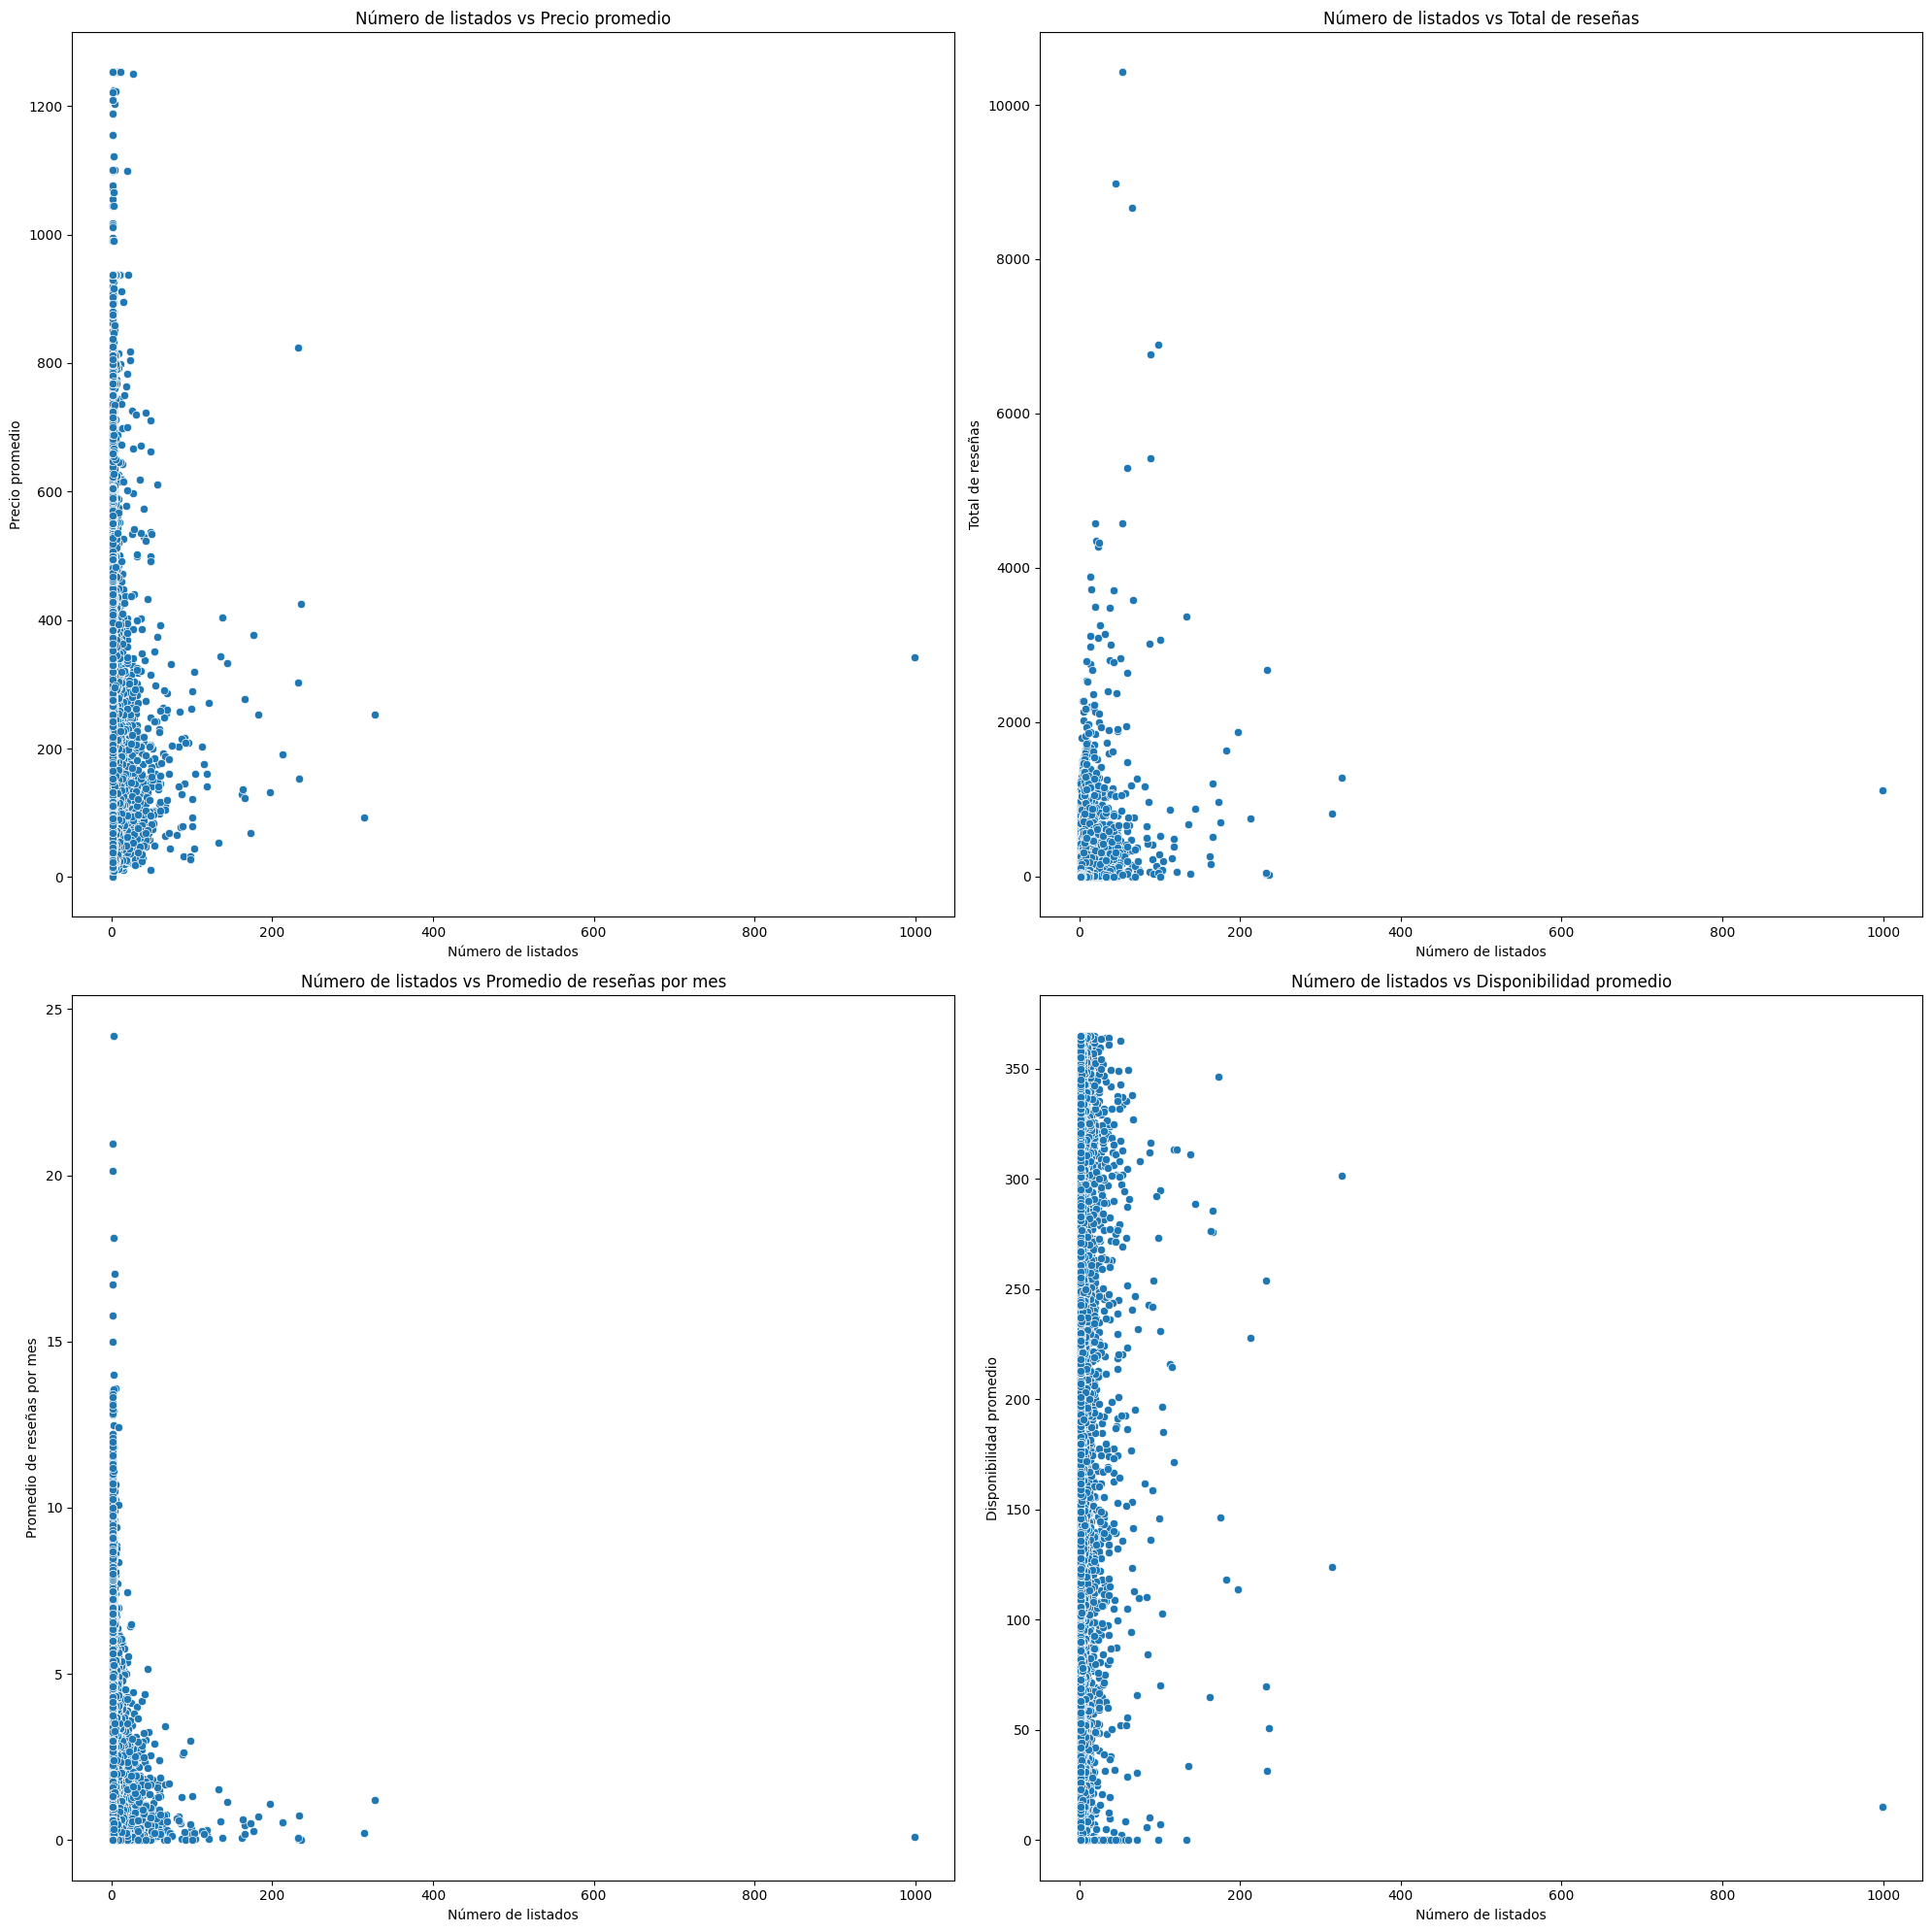

Características de los anfitriones más exitosos:
       num_listings     avg_price  total_reviews  avg_reviews_per_month  \
count  14451.000000  14451.000000   14451.000000           14451.000000   
mean       2.989689    112.581574     198.217494               3.265715   
std        8.124360     89.112466     294.391389               1.707042   
min        1.000000      1.000000      15.000000               0.207675   
25%        1.000000     58.850000      87.000000               2.101930   
50%        1.000000     89.000000     132.000000               2.900769   
75%        2.000000    137.881579     212.500000               4.030000   
max      327.000000   1252.900000   10425.000000              24.203333   

       avg_availability  success_score  
count      14451.000000   14451.000000  
mean         140.174079     654.890203  
std          118.291414    1268.541185  
min            0.000000     145.770000  
25%           30.000000     216.695000  
50%          117.000000     3

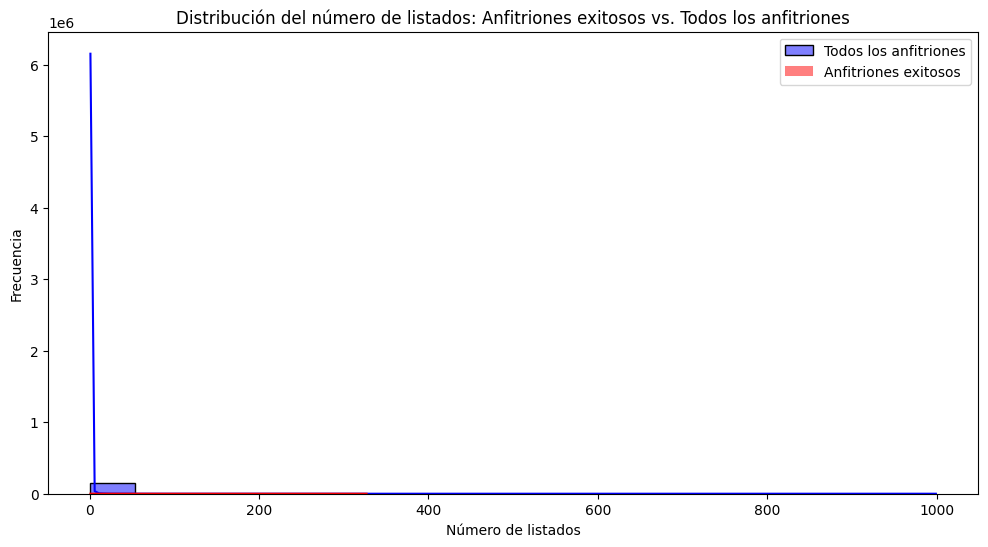

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que df_combined es nuestro DataFrame combinado

# 1. Relación entre el número de listados por anfitrión y otras variables

# Agrupar por anfitrión y calcular métricas
host_metrics = df_combined.groupby('host_id').agg({
    'id': 'count',
    'price': 'mean',
    'number_of_reviews': 'sum',
    'reviews_per_month': 'mean',
    'availability_365': 'mean'
}).rename(columns={
    'id': 'num_listings',
    'price': 'avg_price',
    'number_of_reviews': 'total_reviews',
    'reviews_per_month': 'avg_reviews_per_month',
    'availability_365': 'avg_availability'
})

# Visualizar las relaciones
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

sns.scatterplot(data=host_metrics, x='num_listings', y='avg_price', ax=axes[0, 0])
axes[0, 0].set_title('Número de listados vs Precio promedio')
axes[0, 0].set_xlabel('Número de listados')
axes[0, 0].set_ylabel('Precio promedio')

sns.scatterplot(data=host_metrics, x='num_listings', y='total_reviews', ax=axes[0, 1])
axes[0, 1].set_title('Número de listados vs Total de reseñas')
axes[0, 1].set_xlabel('Número de listados')
axes[0, 1].set_ylabel('Total de reseñas')

sns.scatterplot(data=host_metrics, x='num_listings', y='avg_reviews_per_month', ax=axes[1, 0])
axes[1, 0].set_title('Número de listados vs Promedio de reseñas por mes')
axes[1, 0].set_xlabel('Número de listados')
axes[1, 0].set_ylabel('Promedio de reseñas por mes')

sns.scatterplot(data=host_metrics, x='num_listings', y='avg_availability', ax=axes[1, 1])
axes[1, 1].set_title('Número de listados vs Disponibilidad promedio')
axes[1, 1].set_xlabel('Número de listados')
axes[1, 1].set_ylabel('Disponibilidad promedio')

plt.tight_layout()
plt.show()

# 2. Identificar características de los anfitriones más exitosos

# Definir "éxito" basado en el total de reseñas y el promedio de reseñas por mes
host_metrics['success_score'] = host_metrics['total_reviews'] * host_metrics['avg_reviews_per_month']

# Identificar el top 10% de anfitriones más exitosos
top_hosts = host_metrics.nlargest(int(len(host_metrics) * 0.1), 'success_score')

print("Características de los anfitriones más exitosos:")
print(top_hosts.describe())

# Comparar anfitriones exitosos con el promedio
print("\nComparación con el promedio general:")
print(pd.DataFrame({
    'Top 10%': top_hosts.mean(),
    'Promedio general': host_metrics.mean()
}))

# Visualizar la distribución de listados para anfitriones exitosos vs. todos los anfitriones
plt.figure(figsize=(12, 6))
sns.histplot(data=host_metrics, x='num_listings', kde=True, color='blue', alpha=0.5, label='Todos los anfitriones')
sns.histplot(data=top_hosts, x='num_listings', kde=True, color='red', alpha=0.5, label='Anfitriones exitosos')
plt.title('Distribución del número de listados: Anfitriones exitosos vs. Todos los anfitriones')
plt.xlabel('Número de listados')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

Análisis y Conclusiones

1. Relación entre el número de listados y otras variables:

a) Número de listados vs Precio promedio:
   - No hay una correlación clara entre el número de listados y el precio promedio.
   - Los anfitriones con pocos listados tienen una amplia variación de precios.
   - Algunos anfitriones con muchos listados tienden a tener precios más bajos, pero no es una regla general.

b) Número de listados vs Total de reseñas:
   - Hay una tendencia positiva: más listados generalmente implican más reseñas en total.
   - Sin embargo, hay mucha dispersión, especialmente para anfitriones con pocos listados.

c) Número de listados vs Promedio de reseñas por mes:
   - No hay una correlación clara.
   - Anfitriones con pocos listados pueden tener tanto altas como bajas tasas de reseñas mensuales.

d) Número de listados vs Disponibilidad promedio:
   - Ligera tendencia positiva: anfitriones con más listados tienden a tener mayor disponibilidad.
   - Gran variabilidad, especialmente para anfitriones con pocos listados.

2. Características de los anfitriones más exitosos:

a) Número de listados:
   - Media de 2.99 listados para anfitriones exitosos vs 1.52 para el promedio general.
   - Los anfitriones exitosos tienden a tener más propiedades, pero no necesariamente muchas.

b) Precio promedio:
   - $112.58 para anfitriones exitosos vs $127.74 para el promedio general.
   - Sorprendentemente, los anfitriones exitosos tienen precios ligeramente más bajos en promedio.

c) Total de reseñas:
   - 198.22 para anfitriones exitosos vs 30.65 para el promedio general.
   - Los anfitriones exitosos reciben muchas más reseñas, lo que sugiere mayor ocupación o mejor servicio.

d) Promedio de reseñas por mes:
   - 3.27 para anfitriones exitosos vs 0.84 para el promedio general.
   - Los anfitriones exitosos reciben reseñas con mucha más frecuencia.

e) Disponibilidad promedio:
   - 140.17 días para anfitriones exitosos vs 94.76 para el promedio general.
   - Los anfitriones exitosos mantienen sus propiedades disponibles por más tiempo.

3. Distribución del número de listados:
   - La gran mayoría de los anfitriones (tanto exitosos como no exitosos) tienen pocos listados (1-5).
   - Los anfitriones exitosos tienen una distribución ligeramente más extendida hacia un mayor número de listados.

Conclusiones:
1. El éxito no está necesariamente ligado a tener muchos listados, pero los anfitriones exitosos tienden a tener más que el promedio.
2. Los precios más bajos pueden contribuir al éxito, posiblemente al atraer más huéspedes y generar más reseñas.
3. La clave del éxito parece estar en la cantidad y frecuencia de las reseñas, lo que sugiere una combinación de alta ocupación y buen servicio.
4. Mantener una alta disponibilidad es importante para el éxito.
5. La mayoría de los anfitriones, incluso los exitosos, operan a pequeña escala (1-5 propiedades).

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------